# Bird Population Decline in the United States
Calvin Davis, Sabine May, Braden Nowicki, Hudson Jones

### "Occasional encounters with distant acquaintances can provide important information for job search"

<div style="text-align: center;">
    <img src="../SharedData/TELI.JPG" alt="Description" style="max-width: 33%; height: auto;">
</div>

## Introduction
Recent studies have shown a staggering decline in bird populations across North America since 1970 ([Nearly 3 Billion Birds Gone](https://www.birds.cornell.edu/home/bring-birds-back/#:~:text=NARRATOR%3A%20Birds%20are%20losing%20the,toxic%20pesticides%20and%20insect%20declines.)) Worldwide, we are seeing a similarly dramatic loss of biodiversity. These changes are dire consequences of a world pushed to the brink by human activity. It is of utmost importance that we understand, address, and potentially alleviate these harmful changes.

Birds are essential to our ecosystems and our wellbeing. They play critical roles in [pest control, pollintation, seed dispersal,](https://www.birdlife.org/news/2019/01/04/why-we-need-birds-far-more-than-they-need-us/) and overall maintaining the balance of nature. Their presence is an indicator of a healthy environment, and decline in bird populations signifies broader environmental issues that also impact other wildlife and human health. 

More than ever, data science is an integral part of developing such understanding and promoting positive change in the world. The subject of bird loss - along with a wider range of environmental/conservation subjects - will benefit greatly from the application of quality data science. This project is therefore a pertinent exercise in using data science for positive change, as well as a fantastic example of the power of data science in the current day.

In this report, we present the complete data science pipeline, incorporating the following steps:

1. Data Collection
2. Data Processing
3. Exploratory Data Analysis and Visualization
4. Hypothesis Testing and Machine Learning
5. Insight and Policy Decision

The issue of bird population decline is a complex and nuanced one, but we hope to provide the reader with an improved understanding of some critical factors through our analysis, such as habitat loss, urbanization/human activity, commercial building density, tree cover loss, and temperature increase due to climate change. These factors barely scratch the surface of the complex ways ecosystems and biodiversity respond to widespread change, but analyzing them in connection with bird population decline will hopefully prompt us to consider the environmental impacts of what we do. On a local level, a national level, and an international level, we can implement policies that curtail this dramatic bird loss; to do so, we must first understand what the data tells us.

This project was done using [IPython](https://ipython.org/) and [Jupyter Notebooks](https://jupyter.org/), which provide easy and interactive coding environments for Python.

## Data Collection

In this part of the data science pipeline, we bring together multiple trustworthy sources of data.
Please read the following descriptions of the 5 datasets used in this project.

### North American Breeding Bird Survey (BBS) Dataset

The primary data set we will be working with is the [North American Breeding Bird Survey Dataset](https://www.sciencebase.gov/catalog/item/52b1dfa8e4b0d9b325230cd9). This is a cohesive, well-maintained, and annually-updated dataset containing bird count data across North America. The data is organized by state and, within each state, by route. Routes are designated paths/locations where skilled avian identifiers (birders) use their ears and eyes to count all birds in the area (by species). Typically, bird counts at a route are done in June of each year. This dataset is widely used by environmental and federal agencies to track the population health of over 700 species of birds.

We will be using this dataset to measure bird population data and, in particular, population decline over the years 1966-2022 (included in the 2023 data release). Note that there is no data for 2020 because the BBS halted operations during the COVID-19 pandemic. Eventually, we will bring in other environmental datasets to get an idea for what factors lead to bird population decline.

The most recent data release can be downloaded from the North American Breeding Bird Survey Dataset page linked above. Under "Child Items," download "2023 Release - North American Breeding Bird Survey Dataset (1966-2022)." The README contains useful information on the structure of the data. We will mainly be working with the CSV files within the "States" folder; these files contain information about the number of birds of each species counted at each stop for each year. We will also use information in "routes.csv", which includes coordinates and information about each route that we can use to connect the population counts with other environmental data sets.

We store the desired files in a directory titled 'Data'. Feel free to change the directory structure and adapt the paths in the code to your specific file structure.


### Global Forest Watch Deforestation Data

Download the excel file from the download icon next to "Share Dashboard" in [Global Forest Watch](https://www.globalforestwatch.org/dashboards/country/USA/?category=forest-change). 

Each county has eight entries in the dataset detailing different "thresholds" of forest coverage. The data was created using remote sensing, dividing the US into a very large grid of 30 meter by 30 meter squares. The thresholds detail which squares are included in the numbers by the percentage of forest coverage in each square; for example, the data point for Prince George's County, MD at threshold 50 details the forest loss for all of the squares within PG county that started with at least 50% forest coverage, but ignores squares in PG county with less initial forest coverage than that.

There are two CSV files (one that maintains the by-year distinction, and one that sums the forest loss across the years) saved for each threshold level: 0, 10, 15, 20, 25, 30, 50, 75. There are also two CSV files saved with all thresholds included.

The data is divided into counties, and further divided into forest loss by year. There is also a metric indicating the percentage of the forest loss based on the total forest area in each county. 

Not every bird thrives in forested habitat. However, deforestation is a form of habitat loss for many birds. This is a significant factor in areas with lots of forested space, such as Maryland, and so may prove important when we zoom in and analyze this bird population decline in Maryland.

### National Center for Health Statistics Urban-Rural Classification (By County)

This data is a survey from 2013 rating each US county's level of urban development. This may be an important factor affecting bird population health. Migrating birds often die by striking tall buildings. Also, urban expansion is linked with habitat loss.

1 = Large central metropolitan (Big cities)

2 = Large fringe metropolitan

3 = Medium metropolitan

4 = Small metropolitan

5 = Micropolitan

6 = Non-core (Rural)

You'll need to download this data from [CDC NCHS Urban-Rural Classification](https://www.cdc.gov/nchs/data_access/urban_rural.htm#:~:text=NCHSurbruralcodes,XLS%20%E2%80%93%20175%20KB%5D)
This link will highlight the thing you need to download--the "NCHSUrbRuralCodes" XLS file.
Download it and place it in the data folder, making sure it's named "NCHSURCodes2013.xlsx".

### Open Energy Data Initiative: City and County Commercial Building Inventories

This dataset includes information about a significant amount of commercial buildings in the United States. At [Open Energy Data Intiative](https://data.openei.org/submissions/906), download the data in .xlsb files for all regions (Midwest, Northeast, South Atlantic, South Central, West). This is a very large dataset (over two million entries!), so once you run the data processing code for this dataset (shown below), **do not** run it again. Processing the data to a more concise, usable form takes several minutes. After processing the relevant data will be stored as a CSV in the SharedData folder (or any folder you want).

Similarly to the urban-rural classification data, building density (which we will extract from this data) provides a fantastic metric for tracking human developments which may cause habitat loss and population decline.

### National Centers for Environmental Information: Climate Time Series
We would like to consider temperature changes in the US (related to climate change). Temperature changes results in habitat changes and potential habitat loss. Birds have evolved and adapted to survive in very specific ecological niches; as temperatures change, food sources and landscapes within a habitat change. Because of this, many birds develop trouble finding food and shelter in habitats where they previously thrived (for more information, see this article by the [Audobon Society](https://www.audubon.org/news/study-identifies-areas-most-likely-sustain-biodiversity-changing-climate-0?ms=digital-eng-paid_search-google-x-20240100-google_grant&utm_source=google&utm_medium=paid_search&utm_campaign=20240100_google_grant&gad_source=1&gclid=CjwKCAjwo6GyBhBwEiwAzQTmc_o2jsLFUF7hyeoqPKqEJhME2Ur5e5vJMdl5x7zGWsrrc2KJqBwV7RoCOLEQAvD_BwE)).

The [National Centers for Environmental Information Website](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series/110/tavg/12/0/1966-2022?base_prd=true&begbaseyear=1970&endbaseyear=2022) provides National Time Series data for a variety of metrics. For this project, we want the Average Temperature, the Maximum Temperature, the Minimum Temperature, and the Precipitation all on a 12-Month timescale (considering All Months) for the years 1966-2022. This data will be scraped with the requests library.

### ESRI US Counties Geospatial Dataset
Since large amounts of our environmental data are aggregated by county, as well as county serving as a division that is neither too narrow or too wide for analysis, we'd like to be able to merge these datasets, aggregating by county. The issue that arises is that even though most environmental datasets are already sorted by county, the information they use to identify the counties are not consistent. There are a wide variety of ways to identify the county location of a particular entry: For US states, this could be the state's full name, two-letter postal abbreviation, or FIPS code. For US counties, this could be the county's full name or FIPS code, both of which also depend on the state (for example, many states have a "Washington County", and each county's FIPS code is particular to the state it lies in). As such, there are a lot of different combinations of these representations that can occur in these datasets, and sometimes these may not overlap enough to create a meaningful merge. This is where a common county information dataset comes into play. This information comes from the Environmental Systems Research Institute, and contains most of the different representations (State FIPS, County FIPS, State Name, County Name), and can serve as a common ground for merging datasets. 

The other benefit of this is that it includes *shapefile* data, which creates a geospatial representation of the counties. This representation allows for identifying counties that particular longitude and latitude coordinates lie within, which serves as a useful tool for translating the BBS birding routes, which are specified by longitude and latitude, to counties, to be able to match environmental data to bird data.

Download this dataset which is highlighted at the following link: [ESRI County Shapefile Forum](https://community.esri.com/t5/arcgis-enterprise-portal-questions/where-can-i-find-a-shapefile-with-all-us-counties/td-p/307592#:~:text=Hi%20Robert%2C,UScounties.zip), provided by an anonymous user in response to another user searching for such a dataset, having retrieved it from ESRI.

### MetricT: Tennessee Politics Geospatial Dataset
The other thing that we'd like to be able to do is create geographical maps of county-aggregated data that present meaningful visualizations of the data, coloring each county by some metric to show patterns and distributions. While the ESRI counties dataset contains geospatial shapefile data, it maintains the true geographic positions and scales of the country, including Alaska and Hawaii. While this is useful for pinpointing longitude and latitude and other processing applications, it creates issues for visualization. In their actual locations, Alaska appears disproportionately large due to its vast size and the distortion effects of map projection, while Hawaii appears small and distant. This configuration results in a map where the contiguous United States is reduced in size and shifted, creating an unbalanced visual with excessive empty space where Canada and the Pacific Ocean are typically located. Such a map can be difficult to interpret and aesthetically unappealing. This dataset, created by a GitHub user named MetricT, includes county shapefiles that reposition and rescale Alaska and Hawaii to be conveniently visible below the map of the contiguous United States. This adjustment is a common practice in many published maps to improve visual clarity and coherence. Therefore, the adjusted dataset is designed for visualizations that focus on county-level data, ensuring a more cohesive and accessible representation of all U.S. counties. However, it is important to note that for applications requiring precise geographic data, such as the mapping of routes using specific latitude and longitude coordinates, the ESRI counties dataset should be used to ensure accuracy in spatial relationships and geographic positioning.

Download this dataset (us_county.tar.xz) from this GitHub repository at this link: [TN_Politics GitHub](https://github.com/MetricT/TN_Politics/blob/master/shapefiles/us_county.tar.xz).

### US Census Dataset on County Land Areas
The total land area of each county is a useful metric to use for processing other data. The United States Census Bureau released data on several demographic and geographical indicators in 2011 following the 2010 Census, and county land areas in square miles is included.

Download this dataset (LND01.xls) from the Census Bureau's website: [USA Counties 2011](https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html#:~:text=%5B8.8%20MB%5D-,Land%20Area,-LND01.xls%20%5B1.5).

**Installs and Imports**

Run the following pip (or conda, if using Anaconda) installs if you don't already have access to the packages. Note that we install pyarrow even though we don't use it; this is to keep this project compatible with pandas 3.0 and above. Additionally, pyogrio and fiona are dependencies for geopandas. 

In [71]:
# pip install openpyxl # (for reading/writing excel files)

# pip install pandas 
# pip install pyarrow # to keep project compatible with pandas versions >= 3.0 

# pip install numpy

# pip install geopandas
# pip install pyogrio # (dependency for geopandas)
# pip install fiona # (dependency for geopandas)

# pip install cartopy
# pip install shapely

# pip install requests
# pip install matplotlib
# pip install scikit-learn

Now make the following imports. 

In [7]:
# Data Collection, Storage/Manipulation
import pandas as pd
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Point
import requests

# Data Visualization
import matplotlib.pyplot as plt

# Data Analysis/Hypothesis Testing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as stats 

# Additional Useful Imports
import os
from os import walk

# Used for retrieving files later on
current_dir = os.getcwd()


[Pandas](https://pandas.pydata.org/) is a versatile and expansive data analysis and manipulation tool built for Python. Pandas incorporates useful data structures like data frames and data series. We will make extensive use of Pandas for this project.

[Numpy](https://numpy.org/) is a widely used package for scientific computing.

[Geopandas](https://geopandas.org/en/stable/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) are used primarily for working with geospatial data and maps in Python. [Shapely](https://pypi.org/project/shapely/) also allows for more effective manipulation and analysis of geometric objects.

[Requests](https://pypi.org/project/requests/) is an HTTP library used for scraping data from websites.

[Matplotlib](https://matplotlib.org/) and [PyPlot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) are used for plotting and visualization in Python.

[SciKit Learn's Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is used to perform Ordinary Least Squares Linear Regression.

[OS](https://docs.python.org/3/library/os.html) is for dealing with operating system interfaces and filepaths.




## Data Processing
In Data Processing, we clean the data from our sources, adjust them for usability, and combine them together. One particularly useful piece of information for combining datasets is the FIPS code. This code uniquely identifies counties in the United States. As you will see, we are able to use the coordinates of each bird route in the North American Breeding Bird Survey Dataset to find the county, and the FIPS code, of each route. Many environmental datasets use FIPS code and/or longitude and latitude coordinates, so we are able to find environmental data associated with each route.

For more information on data processing, see [this article](https://medium.com/@TheWuraolah/introduction-to-data-engineering-a-complete-beginners-guide-0b955f5eb50c). Also, see [this paper](https://vita.had.co.nz/papers/tidy-data.pdf) on tidy data.

### Processing North American Breeding Bird Survey Dataset

**Processing Bird Counts**

First, we will process data related the number of birds recorded on each route using files in the States directory. 

Each file in the States directory of this dataset contains a CSV file whose tuples follow the format (RouteDataID, CountryNum, StateNum, Route, RPID, Year, AOU, Count10, Count20, Count30, Count40, Count50, StopTotal, SpeciesTotal). Familarize yourself with the following descriptions of each attribute, taken partially from the "North American Breeding Bird Survey Dataset (1966-2022).xml" README file. Recall that the dataset was created by having birders along many routes on the North American Continent count the number of birds at their location. Each route has 50 stops at which birds were counted. 

CountryNum: the ID of the country in which the route is located.

StateNum: the ID of the state in which the route is located. 

Route: the ID of a route within a state (i.e., Route is unique within states but not between states)

RPID (Run Protocol ID): the ID of the protocol used in order to count the birds 

AOU: the ID of the bird species being counted

Count10: the total individuals of the species recorded on stops 1-10 (sum of stops 1-10)

Count20: the total individuals of the species recorded on stops 11-20 (sum of stops 11-20)

Count30 - Count50: see the pattern for Count10 and Count20. 

StopTotal: the total number of stops (out of 50) where the species was recorded. 

SpeciesTotal: the total individuals of the species recorded on that run of the route (sum of all stops)

RouteDataID: a data identification number that is unique for each combination of CountryNum, StateNum, Route, RPID, and Year

Now that we understand the data in the States directory, let's read all the available CSV files within that directory into a pandas dataframe for processing. There's a lot of data, so this will take a moment. Make a copy of the resulting dataframe so that if you misapply an operation later on, you can fetch the original dataframe without re-running this code. 

In [8]:
# Get the names of all the files in the States directory
filenames = next(walk("../Data/States"), (None, None, []))[2]  # [] if no file

# Read each file into a dataframe called interval_stop
interval_stop = pd.DataFrame()
for filename in filenames: 
    temp = pd.read_csv(f'../Data/States/{filename}')
    interval_stop = pd.concat([interval_stop, temp], ignore_index=True)

# Make a copy of interval_stop to work on
interval_stop_copy = interval_stop.copy()
interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,6234747,840,2,1,101,1967,2010,0,0,0,2,0,2,2
1,6234747,840,2,1,101,1967,2020,0,0,0,0,1,1,1
2,6234747,840,2,1,101,1967,2030,0,1,0,0,0,1,1
3,6234747,840,2,1,101,1967,2730,0,0,7,1,0,4,8
4,6234747,840,2,1,101,1967,2890,13,12,16,7,4,28,52


Now we want to ensure that differences in bird counts are not due to differences in sampling protocol, so let's look at the RPIDs in our dataframe. The README file informs us that RPIDs 101-104 all represent Standard BBS Protocol, and the only difference between them is their run number. For example, RPID 101 is the first sampling done during breeding season using BBS Protocol. RPID 102 is the second sampling done during breeding season suing BBS Protocol, etc. Since these are essentially different "trials," let's average the results across these four protocols for every route. 

The other RPIDs in our dataframe, 203, 501, and 502, represent experimental protocols. Without conducting seperate research on the effect of these protocols on sampling, we have no way to combine them with data gotten with the 100-level protocols. Luckily, only a minority of observations use these RPIDs. Let's drop them from our dataset. 

In [9]:
# Get rid of experimental protocols (i.e., those with RPIDs that are not between 101 and 104)
interval_stop_copy = interval_stop_copy[(interval_stop_copy['RPID'] >= 101) & (interval_stop_copy['RPID'] <= 104)]

# Average the bird counts across runs
interval_stop_copy = interval_stop_copy.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year', 'AOU']).agg({'Count10':['mean'], 'Count20':['mean'], 'Count30':['mean'], 'Count40':['mean'], 'Count50':['mean'], 'StopTotal':['mean'], 'SpeciesTotal':['mean']})

# Flatten the multi-indices in both the columns and rows
interval_stop_copy.columns = ['_'.join(col) for col in interval_stop_copy.columns.values]
interval_stop_copy.reset_index(inplace=True)

interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,AOU,Count10_mean,Count20_mean,Count30_mean,Count40_mean,Count50_mean,StopTotal_mean,SpeciesTotal_mean
0,6165530,840,52,32,1968,2610,0.0,0.0,3.0,0.0,4.0,6.0,7.0
1,6165530,840,52,32,1968,2730,0.0,0.0,3.0,0.0,0.0,1.0,3.0
2,6165530,840,52,32,1968,2890,15.0,8.0,14.0,11.0,7.0,32.0,55.0
3,6165530,840,52,32,1968,3131,0.0,1.0,0.0,1.0,0.0,2.0,2.0
4,6165530,840,52,32,1968,3160,14.0,11.0,17.0,9.0,9.0,34.0,60.0


Output this dataset to a CSV file "Interval_All_Routes.csv." We'll do this periodically throughout the tutorial in order to (a) let collaborators access your processed data from their own notebook and (b) let you leave the notebook without having to re-run everything when you come back.

In [10]:
interval_stop_copy.to_csv(os.path.join(current_dir, '..', 'Data', 'Interval_All_Routes.csv'), index=False)

We're not super interested in the plight of specific species (yet), so let's also combine the counts for all species within a given route. 

In [11]:
# Sum across AOU for every route
interval_stop_copy = interval_stop_copy.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year']).agg({'Count10_mean':['sum'], 'Count20_mean':['sum'], 'Count30_mean':['sum'], 'Count40_mean':['sum'], 'Count50_mean':['sum'], 'StopTotal_mean':['sum'], 'SpeciesTotal_mean':['sum']})

# Flatten the multi-indices in both the columns and rows
interval_stop_copy.columns = ['_'.join(col) for col in interval_stop_copy.columns.values]
interval_stop_copy.reset_index(inplace=True)

# MS stands for MeanSum (we took the average across run protocols, then totaled the count across species)
interval_stop_copy.columns = ['RouteDataID', 'CountryNum', 'StateNum', 'Route', 'Year', 'Count10_MS', 'Count20_MS', 'Count30_MS', 'Count40_MS', 'Count50_MS', 'StopTotal_MS', 'SpeciesTotal_MS']

# Output to CSV file
interval_stop_copy.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Interval_Aggs_All_Routes.csv'), index=False)

interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,StopTotal_MS,SpeciesTotal_MS
0,6165530,840,52,32,1968,182.0,207.0,191.0,191.0,194.0,481.0,965.0
1,6165531,840,52,35,1968,159.0,139.0,132.0,135.0,116.0,354.0,681.0
2,6165532,840,52,36,1968,193.0,225.0,170.0,160.0,162.0,584.0,910.0
3,6165533,840,53,5,1968,84.0,97.0,96.0,114.0,210.0,188.0,601.0
4,6165534,840,53,2,1968,95.0,76.0,76.0,88.0,91.0,283.0,426.0


**Processing Vehicle Counts**

Now we will be processing data related to vehicles recorded on each route with the file "VehicleData.csv."

Each obsevervation in "VehicleData.csv" follows the format (RouteDataID, CountryNum,StateNum, Route, RPID, Year, RecordedCar, Car1,Car2, ... , Car50, Noise1, Noise2, ..., Noise50).

The only new attributes are...

RecordedCar: a boolean value indicating whether the observer consistently recorded the number of passing vehicles (i.e. at all sampled stops) while sampling the route.

Car1: the total number of motorized vehicles that passed Stop 1 during sampling.

Noise1: a boolean value indicating whether there was noise from sources other than vehicles passing the survey point that lasted for more than 45 seconds and significantly interfered with observer's ability to hear birds at the stop.

First, read the CSV into a dataframe, and note that there are many less observations in this dataframe than there are routes. Vehicle data must not have been recorded for every route. 

In [12]:
vehicles = pd.read_csv("../Data/VehicleData.csv")

# Vehicle data must not have been recorded for every route.
print(f"Number of routes where vehicle observations were taken: {len(vehicles)}")
print(f"Number of routes: {len(interval_stop_copy)}")

vehicles.head(5)

Number of routes where vehicle observations were taken: 76514
Number of routes: 135192


,RouteDataID,CountryNum,StateNum,Route,RPID,Year,RecordedCar,Car1,Car2,Car3,...,Noise41,Noise42,Noise43,Noise44,Noise45,Noise46,Noise47,Noise48,Noise49,Noise50
0,6167164,124,4,1,101,2000,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6248812,124,4,1,101,2005,1.0,3,4,5,...,0,0,0,0,0,0,0,0,0,0
2,6297584,124,4,1,101,2006,NaN,5,5,4,...,0,0,0,0,0,0,0,0,0,0
3,6297586,124,4,1,101,2007,NaN,4,4,2,...,0,0,0,0,0,0,0,0,0,0
4,6358333,124,4,1,101,2015,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Now we want to get rid of unreliable observations. Whenever RecordedCar is NaN or 0, it means that the birder did not consistently count cars for all stops. Drop those rows from the dataframe, since there's no way to know at which stops they did not count cars.

In [13]:
# Get rid of anything that's not certain (NaNs in RecordedCar or 0s in RecordedCar)
vehicles.fillna(0, inplace=True) # Replace NaNs with 0s
vehicles.drop(vehicles[vehicles['RecordedCar'] == 0].index, inplace=True) # Drop all 0s

 As for the Noise columns, let's calculate the sparseness of the Noise matrix. If there aren't many interferences, we can ignore the Noise columns completely, as we won't be looking at bird counts at individual stops, but rather aggregating many stops over many routes. A small number of undercounts due to noise should not affect the overall patterns we see. 

In [14]:
noise = pd.DataFrame(vehicles[vehicles.columns[vehicles.columns.get_loc('Noise1'):]])
noise = noise.astype(pd.SparseDtype('int', 0))
print(f"The ratio of non-sparse data points to total data points in the Noise columns is {noise.sparse.density}") 


The ratio of non-sparse data points to total data points in the Noise columns is 0.04790848396026707


A density of 0.045 is a very sparse matrix. Only 4.5% of the datapoints in the Noise columns are non-zero. So, let's ignore Noise completely. 

In [15]:
# Get rid of Noise columns 
vehicles.drop(vehicles.columns[vehicles.columns.get_loc('Noise1'):], axis=1, inplace=True)

Next, restrict RPIDs and average across them like we did previously.

In [16]:
# restrict RPIDs
vehicles = vehicles[(vehicles['RPID'] >= 101) & (vehicles['RPID'] <= 104)]
vehicles.reset_index(drop = True, inplace=True)

# average across RPIDs
car_dict = {}
for x in range(1, 51):
    car_dict[f'Car{x}'] = ['mean']

vehicles = vehicles.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year', 'RecordedCar']).agg(car_dict)

# Flatten the multiindices in both the columns and rows
vehicles.columns = ['_'.join(col) for col in vehicles.columns.values]
vehicles.reset_index(inplace=True)

Finally, get interval count data for Cars like in the interval_stop_copy dataframe by summing across Car1 - Car10, Car11 - Car20, etc, and also adding a column for the total number of cars counted on a route. Get rid of the car counts for individual stops. 

In [17]:
# Create interval count columns for Car
cars = []
past_cars = []

for x in range(1, 51, 10):
    for y in range(x, x+10):
        cars.append(f'Car{y}_mean')
        past_cars.append(f'Car{y}_mean')

    vehicles[f'Car_Count{y}'] = vehicles[cars].sum(axis = 1)
    cars = []

# Create total count column for Car
vehicles['Car_Total'] = vehicles[past_cars].sum(axis=1)

vehicles.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,RecordedCar,Car1_mean,Car2_mean,Car3_mean,Car4_mean,...,Car47_mean,Car48_mean,Car49_mean,Car50_mean,Car_Count10,Car_Count20,Car_Count30,Car_Count40,Car_Count50,Car_Total
0,6165782,840,34,36,2003,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,5.0,15.0,7.0,0.0,31.0
1,6165783,840,34,38,2003,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,0.0,2.0,6.0,3.0,16.0,27.0
2,6165785,840,34,40,2003,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,4.0,11.0,97.0,11.0,14.0,40.0,173.0
3,6165786,840,34,44,2003,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,5.0,1.0,1.0,2.0,5.0,14.0
4,6165787,840,34,42,2003,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,3.0,28.0,15.0,23.0,12.0,81.0


**Preliminary Visualization of Bird Counts**

Really quickly, let's do basic visualization of our data. We'll do this more deeply in the "Exploratory Data Analysis and Visualization" section when we combine our datasets, but it's good to get an idea of the current patterns we might be dealing with. We'll look at bird loss first by using the interval_stop_copy dataframe. Note that more routes were added over time, so we can't just take the total number of birds recorded across all routes in each year. Watch what happens if we just take raw bird counts, versus if we divide those counts by the number of routes present in a given year.

In [18]:
birds_by_year = interval_stop_copy[['Year', 'SpeciesTotal_MS']].groupby(['Year'])
count = birds_by_year.size()

birds_by_year = birds_by_year.agg({'SpeciesTotal_MS' : ['sum']})

# Flatten the multiindices in both the columns and rows
birds_by_year.columns = ['_'.join(col) for col in birds_by_year.columns.values]
birds_by_year.reset_index(inplace=True)

birds_by_year.columns = ['Year', 'SpeciesTotal']
count.index = birds_by_year.index
birds_by_year['AvgBirdsPerRoute'] = birds_by_year['SpeciesTotal'] / count

num_routes_2022 = count[55]

# Save the dataframe
birds_by_year.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Birds_By_Year.csv'), index=False)

birds_by_year.head(5)


,Year,SpeciesTotal,AvgBirdsPerRoute
0,1966,483377.0,906.898687
1,1967,832503.0,882.823966
2,1968,986836.0,832.070826
3,1969,1128240.0,844.491018
4,1970,1214436.0,848.662474


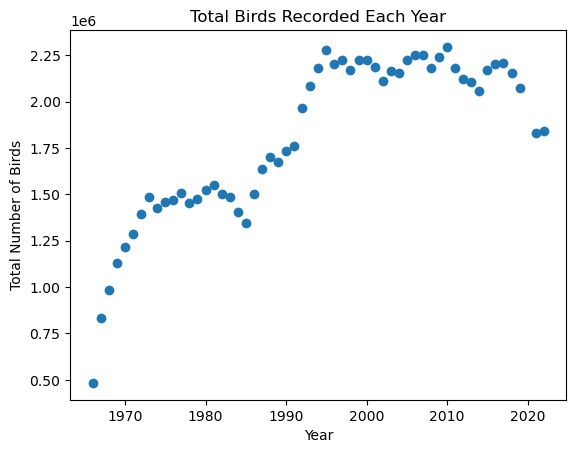

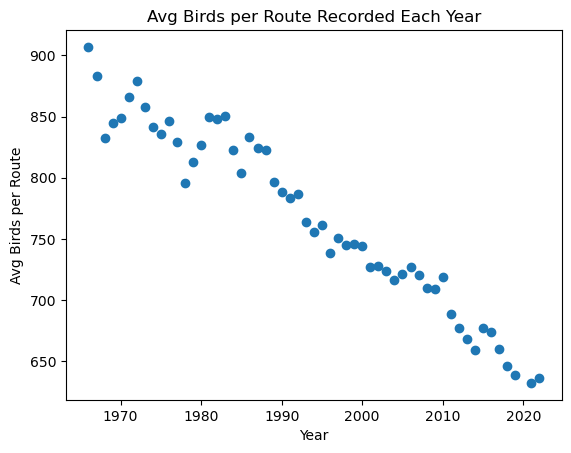

In [19]:
# Raw bird count per year
plt.scatter(birds_by_year['Year'], birds_by_year['SpeciesTotal'])
plt.title("Total Birds Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Birds")
plt.show()

# Bird count normalized by number of routes per year
plt.scatter(birds_by_year['Year'], birds_by_year['AvgBirdsPerRoute'])
plt.title("Avg Birds per Route Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Avg Birds per Route")
plt.show()


Those two graphs tell two very different stories! If we hadn't realized that more routes had been added over time, we might have erroneously concluded that bird populations were actually increasing overtime. Once we normalized by the number of routes present in any given year, however, the true plight of birds became clear. Of course, the vigilant data scientist might ask whether it's valid to normalize by the number of routes in this way. Maybe routes added later on in the study tended to be in naturally less bird-heavy areas compared to those present from the beginning, and their relative lack of importance is why they weren't originally included. In that case, our division by number of routes would be misleading. Our normalization only makes sense if the types of routes added over time are on average similar to the routes from previous years.

In order to definitively convince ourselves that bird populations are decreasing, let's see if the original routes in the study -- those present from 1966 onwards -- suffered a trend in bird count losses similar to our above graph. 

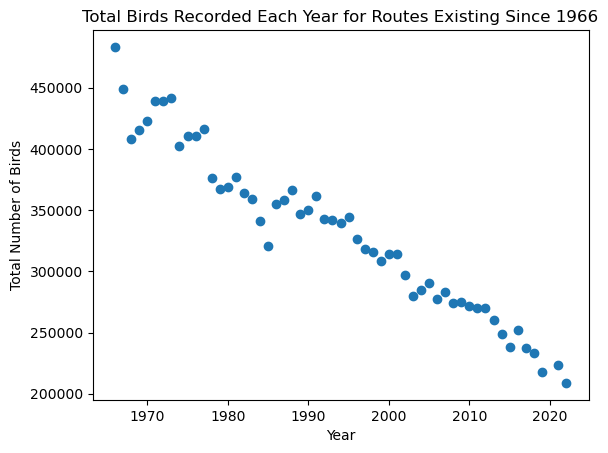

In [20]:
# From interval_stop_copy, get routes that existed in 1966
first_routes = interval_stop_copy[interval_stop_copy['Year'] == 1966]
first_routes = first_routes.drop(['Year'], axis = 1)

# Rejoin these 1966 routes on interval_stop_copy, so that you get bird counts across all years for
# routes having begun in 1966
first_routes = first_routes.merge(interval_stop_copy, how='inner', on=['CountryNum', 'StateNum', 'Route'])
first_routes = first_routes.groupby(['Year']).agg({'SpeciesTotal_MS_y':['sum']})

# Flatten the multiindices in both the columns and rows
first_routes.columns = ['_'.join(col) for col in first_routes.columns.values]
first_routes.reset_index(inplace=True)

first_routes.columns = ['Year', 'SpeciesTotal']

plt.scatter(first_routes['Year'], first_routes['SpeciesTotal'])
plt.title("Total Birds Recorded Each Year for Routes Existing Since 1966")
plt.xlabel("Year")
plt.ylabel("Total Number of Birds")

plt.show()

That's pretty convincing!

**Combining Bird and Vehicle Counts**

Next, we'll see how our bird counts vary with the number of vehicles recorded. We'll merge our interval_stop_copy and vehicles dataframes in order to have both pieces of information in the same place, and more importantly, to restrict the bird counts to routes for which reliable vehicle data was actually recorded.  

In [21]:
intervals_vehicles = interval_stop_copy.merge(vehicles, how='inner', on=['RouteDataID', 'CountryNum', 'StateNum', 'Route', 'Year'])

# Get rid of vehicle counts for individual stops and keep only the interval counts
cols = list(range(0, intervals_vehicles.columns.get_loc('SpeciesTotal_MS') + 1))  + list(range(intervals_vehicles.columns.get_loc('Car_Count10'),intervals_vehicles.columns.get_loc('Car_Total') + 1))
intervals_vehicles = intervals_vehicles.iloc[:, cols]

# Output dataframe to a CSV file
intervals_vehicles.to_csv(os.path.join(current_dir, '..', 'SharedData', 'interval_vehicles.csv'), index=False)

intervals_vehicles.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,StopTotal_MS,SpeciesTotal_MS,Car_Count10,Car_Count20,Car_Count30,Car_Count40,Car_Count50,Car_Total
0,6165782,840,34,36,2003,170.0,192.0,204.0,138.0,75.0,317.0,779.0,4.0,5.0,15.0,7.0,0.0,31.0
1,6165783,840,34,38,2003,132.0,252.0,216.0,247.0,137.0,416.0,984.0,0.0,2.0,6.0,3.0,16.0,27.0
2,6165785,840,34,40,2003,479.0,236.0,218.0,219.0,143.0,529.0,1295.0,11.0,97.0,11.0,14.0,40.0,173.0
3,6165786,840,34,44,2003,314.0,295.0,308.0,233.0,289.0,447.0,1439.0,5.0,1.0,1.0,2.0,5.0,14.0
4,6165787,840,34,42,2003,112.0,107.0,137.0,148.0,103.0,335.0,607.0,3.0,28.0,15.0,23.0,12.0,81.0


In [22]:
# There is some necessary code duplication from the creation of the birds_by_year dataframe here
# since vehicle data is only recorded for a subset of routes

birds_cars_by_year = intervals_vehicles[['Year', 'SpeciesTotal_MS', 'Car_Total']].groupby(['Year'])
count = birds_cars_by_year.size()

birds_cars_by_year = birds_cars_by_year.agg({'SpeciesTotal_MS' : ['sum'], 'Car_Total' : ['sum']})

# Flatten the multiindices in both the columns and rows
birds_cars_by_year.columns = ['_'.join(col) for col in birds_cars_by_year.columns.values]
birds_cars_by_year.reset_index(inplace=True)

birds_cars_by_year.columns = ['Year', 'SpeciesTotal', 'Car_Total']
count.index = birds_cars_by_year.index
birds_cars_by_year['BirdsPerRoute'] = birds_cars_by_year['SpeciesTotal'] / count

# Rescale vehicle data because there are many more cars than birds
# Rescale it to have the same max and min as BirdsPerRoute
birds_cars_by_year['Car_Total'] = (birds_cars_by_year['Car_Total'] - birds_cars_by_year['Car_Total'].min()) / (birds_cars_by_year['Car_Total'].max() -  birds_cars_by_year['Car_Total'].min())
birds_cars_by_year['Car_Total'] =  birds_cars_by_year['Car_Total'] * (birds_cars_by_year['BirdsPerRoute'].max() - birds_cars_by_year['BirdsPerRoute'].min()) + birds_cars_by_year['BirdsPerRoute'].min()

# Output dataframe to a CSV file
birds_cars_by_year.to_csv(os.path.join(current_dir, '..', 'SharedData', 'birds_cars_by_year.csv'), index=False)

birds_cars_by_year.head(5)

,Year,SpeciesTotal,Car_Total,BirdsPerRoute
0,1982,897.0,556.236842,897.000000
1,1997,21137.0,558.791677,556.236842
2,1998,1580611.0,775.447975,741.027192
3,1999,1659924.0,809.964311,745.363269
4,2000,1672287.0,793.514305,746.223561


**Preliminary Visualization of Bird and Vehicle Counts**

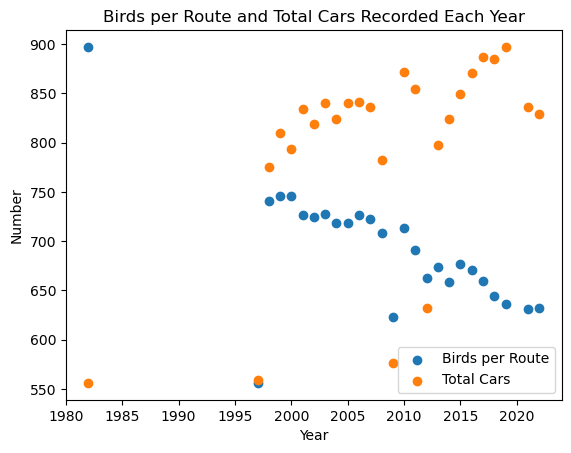

In [23]:
plt.scatter(birds_cars_by_year['Year'], birds_cars_by_year['BirdsPerRoute'])
plt.scatter(birds_cars_by_year['Year'], birds_cars_by_year['Car_Total'])
plt.title("Birds per Route and Total Cars Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend(['Birds per Route', 'Total Cars'])
plt.show()

There seems to be some correlation. Of course, this doesn't mean there's a causal relationship -- maybe both the number of cars and the number of birds per route both vary with time, but are caused by independent factors. That said, this correlation still may be useful in our "Hypothesis Testing and Machine Learning" section when create model that will allow us to predict bird loss. We will choose what features to focus on after analyzing other enviornmental data that, like the number of cars on the road, is related the development of human infrastructure and subsequent damage to natural areas. 

**Combining Routes and FIPS Information**

In order to associate routes with this aforementioned environmental data, we need to pinpoint their locations in the US. Let's associate FIPS numbers with each route. A Federal Information Processing Standard (FIPS) code (sometimes called FP code) is a standard number used to uniquely identify each county in the USA. FIPS codes are five digits long, with the first two being the state and the last three being the county within that state. These are very standard and present in a lot of county level datasets and can be good ID numbers to join datasets on. They are generally organized in alphabetical order (01 = Alabama, 02 = Alaska, …, 56 = Wyoming) but skip some numbers (these are due to US territories existing but aren’t relevant to us). 

First, create a file that joins the route data with county shapefile data to pinpoint the US state and county that each route took place in. The code will output and save a csv file called "Routes_with_FIPS.csv" in the Data folder. Note that all points which lie outside US counties (including all Canadian data) has its state and FIPS codes saved as "None".

In [24]:
# Get the longitudes and latitudes of the routes
csv_file = os.path.join(current_dir, '..', 'Data', 'routes.csv')
df = pd.read_csv(csv_file, encoding='latin-1')

df.head()

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID
0,840,2,1,ST FLORIAN,1,34.868688,-87.604142,14,27,1,1
1,840,2,2,HILLSBORO,0,34.638675,-87.191292,14,24,1,1
2,840,2,3,FLORENCE,0,34.800000,-87.733333,14,24,1,1
3,840,2,4,TRADE,1,34.029788,-87.059235,13,28,1,1
4,840,2,5,SUMMITT,0,34.201669,-86.493409,13,28,1,1


In [25]:
# Get the locations of US counties
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'UScounties', 'UScounties.shp'))

df[["StateName","CountyName","StateFIPS","CountyFIPS"]] = None
state_names = []
state_codes = []
county_names = []
county_codes = []

coordinates = df[["Latitude", "Longitude"]]

# Associate the coordinates of each route with a US county and its FIPS numbers
for i, row in coordinates.iterrows():
    point = Point(row["Longitude"], row["Latitude"])

    # Spatial query to find which county the (longitude, latitude) point is found within
    county = counties[counties.contains(point)]

    # If the point is in the US, extract the appropriate name and FIPS data
    if not county.empty:
        county_name = county.iloc[0]['NAME']
        state_name = county.iloc[0]['STATE_NAME']
        county_fips = county.iloc[0]['CNTY_FIPS']
        state_fips = county.iloc[0]['STATE_FIPS']
        state_names.append(state_name)
        county_names.append(county_name)
        state_codes.append(state_fips)
        county_codes.append(county_fips)
    
    # Otherwise, it's in Canada, and there is no data to extract
    else:
        state_names.append(None)
        county_names.append(None)
        state_codes.append(None)
        county_codes.append(None)

# Associate the extracted data with the routes in the datafrae
df["StateName"] = state_names
df["CountyName"] = county_names
df["StateFIPS"] = state_codes
df["CountyFIPS"] = county_codes

# Output to CSV file
df.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Routes_with_FIPS.csv'), index=False)

df.head()

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,StateName,CountyName,StateFIPS,CountyFIPS
0,840,2,1,ST FLORIAN,1,34.868688,-87.604142,14,27,1,1,Alabama,Lauderdale,01,077
1,840,2,2,HILLSBORO,0,34.638675,-87.191292,14,24,1,1,Alabama,Lawrence,01,079
2,840,2,3,FLORENCE,0,34.800000,-87.733333,14,24,1,1,Alabama,Lauderdale,01,077
3,840,2,4,TRADE,1,34.029788,-87.059235,13,28,1,1,Alabama,Cullman,01,043
4,840,2,5,SUMMITT,0,34.201669,-86.493409,13,28,1,1,Alabama,Blount,01,009


In [26]:
# Finally, combine the State and County FIPS numbers to get the complete FIPS number for each route
df["FIPS"] = df["StateFIPS"] + df["CountyFIPS"]

# Output our final dataframe to a CSV file
df.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Routes_with_FIPS.csv'), index=False)

df["Exists"] = 1
df.head()

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,Exists
0,840,2,1,ST FLORIAN,1,34.868688,-87.604142,14,27,1,1,Alabama,Lauderdale,01,077,01077,1
1,840,2,2,HILLSBORO,0,34.638675,-87.191292,14,24,1,1,Alabama,Lawrence,01,079,01079,1
2,840,2,3,FLORENCE,0,34.800000,-87.733333,14,24,1,1,Alabama,Lauderdale,01,077,01077,1
3,840,2,4,TRADE,1,34.029788,-87.059235,13,28,1,1,Alabama,Cullman,01,043,01043,1
4,840,2,5,SUMMITT,0,34.201669,-86.493409,13,28,1,1,Alabama,Blount,01,009,01009,1


### Processing Global Forest Watch Deforestation Data

Let's calculate the total forest loss in each US county.

In [28]:
# Read data for tree cover loss per US county (ha stands for hectare)
# The Subnational 2 tree cover loss sheet contains data grouped by county
df = pd.read_excel(os.path.join(current_dir, "..", "Data", "Deforestation.xlsx"), sheet_name="Subnational 2 tree cover loss")
# Drop country column; every one is the USA
# Subnational 1 defines one subnational level of aggregation (state)
# Subnational 2 defines a second subnational level of aggregation (county)
df = df.drop(["country"], axis=1).rename(columns={"subnational1": "STATE", "subnational2": "COUNTY"})
df.head(5)


,STATE,COUNTY,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Alabama,Autauga,0,156174,156174,156174,9783,2848,1640,1321,...,1954,2361,2889,3285,2415,2373,1990,2366,1666,1757
1,Alabama,Autauga,10,156174,109666,103665,9783,2831,1634,1314,...,1711,1839,2177,2675,1786,1830,1481,1855,1337,1316
2,Alabama,Autauga,15,156174,108202,102662,9783,2830,1633,1314,...,1706,1826,2164,2655,1774,1815,1471,1841,1326,1302
3,Alabama,Autauga,20,156174,106621,100894,9783,2823,1631,1311,...,1692,1807,2140,2627,1755,1788,1453,1818,1305,1279
4,Alabama,Autauga,25,156174,105337,100504,9783,2819,1630,1310,...,1685,1792,2122,2609,1742,1771,1438,1800,1291,1263


In [29]:
# Convert dataframe from wide format to long format, in order for every unique (State, County, Year) to be its own observation. 
# Now it's easy to see the hectare tree cover loss in every county for each year. 
loss_over_time = df.copy()
# Gain is not helpful for us here and comes from a separate source, which may not be consistent with the loss source
loss_over_time = loss_over_time.drop("gain_2000-2020_ha", axis=1)

# Each county has each year as a column under each threshold; we want each year to be its own row
loss_over_time = loss_over_time.melt(id_vars=["STATE", "COUNTY", "area_ha", "threshold", "extent_2000_ha", "extent_2010_ha"], var_name="Year", value_name="HA_Loss")
# Trim year off the end of each column name
loss_over_time["Year"] = loss_over_time["Year"].str[-4:]
loss_over_time.head(5)

,STATE,COUNTY,area_ha,threshold,extent_2000_ha,extent_2010_ha,Year,HA_Loss
0,Alabama,Autauga,156174,0,156174,156174,2001,2848
1,Alabama,Autauga,156174,10,109666,103665,2001,2831
2,Alabama,Autauga,156174,15,108202,102662,2001,2830
3,Alabama,Autauga,156174,20,106621,100894,2001,2823
4,Alabama,Autauga,156174,25,105337,100504,2001,2819


In [31]:
# Convert hectares to square miles, and calculate the percent of tree cover lost from 2000 to the given year, based on its original extent in 2000.
loss_over_time["area_sqmi"] = loss_over_time["area_ha"] / 259.0
loss_over_time["percent_lost"] = loss_over_time["HA_Loss"] / loss_over_time["extent_2000_ha"]

In [32]:
# Associate FIPS codes with each (State, County) combination
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'UScounties', 'UScounties.shp'))
counties

# Connect county FIPS data to loss data to make it easier to merge with other data
loss_over_time = loss_over_time.merge(counties, how="left", left_on=["STATE", "COUNTY"], right_on=["STATE_NAME", "NAME"])
# Drop shapefile data and duplicated columns
loss_over_time = loss_over_time.drop(["STATE_NAME", "NAME", "geometry"], axis=1)
loss_over_time.head(5)

,STATE,COUNTY,area_ha,threshold,extent_2000_ha,extent_2010_ha,Year,HA_Loss,area_sqmi,percent_lost,STATE_FIPS,CNTY_FIPS,FIPS
0,Alabama,Autauga,156174,0,156174,156174,2001,2848,602.988417,0.018236,01,001,01001
1,Alabama,Autauga,156174,10,109666,103665,2001,2831,602.988417,0.025815,01,001,01001
2,Alabama,Autauga,156174,15,108202,102662,2001,2830,602.988417,0.026155,01,001,01001
3,Alabama,Autauga,156174,20,106621,100894,2001,2823,602.988417,0.026477,01,001,01001
4,Alabama,Autauga,156174,25,105337,100504,2001,2819,602.988417,0.026762,01,001,01001


Output the data to multiple CSV files. 

In [33]:
# Make a directory named 'Deforestation' within the 'Data' folder
directory = os.path.join(current_dir, '..', 'Data', 'Deforestation')
if not os.path.exists(directory):
    os.makedirs(directory)

In [34]:
# For every threshold in the dataset, output all observations that use that threshold to a seperate csv file
# See the description of the Global Forest Watch dataset at the top of this document for a refresher on what 
# the thresholds represent.
for num in loss_over_time["threshold"].unique():
    subset = loss_over_time[loss_over_time["threshold"] == num]
    subset.to_csv(os.path.join(directory, f'Annual_Forest_Loss_Threshold_{num}.csv'), index=False)

# Also export a version of the dataset that includes all data at all thresholds
loss_over_time.to_csv(os.path.join(directory, f'Annual_Forest_Loss_ALL.csv'), index=False)

In [35]:
# Finally, sum the total canopy cover lost for each (State, County, threshold) combination across all
# years from 2000 to 2023, and save it to a CSV file in the Deforestation directory. 
# Group by State, County, and Threshold; also include area and FIPS to stop them from aggregating; sum across all years
total_forest_loss = loss_over_time.groupby(["STATE", "COUNTY", "threshold", "area_ha", "extent_2000_ha", "extent_2010_ha", "area_sqmi", "STATE_FIPS", "CNTY_FIPS", "FIPS"]).agg("sum").reset_index()
# Lose year; year becomes meaningless here
total_forest_loss = total_forest_loss.drop(["Year"], axis=1)

# Save data at each threshold to CSV
for num in total_forest_loss["threshold"].unique():
    subset = total_forest_loss[total_forest_loss["threshold"] == num]
    subset.to_csv(os.path.join(directory, f'Total_Forest_Loss_Threshold_{num}.csv'), index=False)

# Save data at all thresholds to CSV
total_forest_loss.to_csv(os.path.join(directory, f'Total_Forest_Loss_ALL.csv'), index=False)
total_forest_loss.head(5)

,STATE,COUNTY,threshold,area_ha,extent_2000_ha,extent_2010_ha,area_sqmi,STATE_FIPS,CNTY_FIPS,FIPS,HA_Loss,percent_lost
0,Alabama,Autauga,0,156174,156174,156174,602.988417,01,001,01001,47535,0.304372
1,Alabama,Autauga,10,156174,109666,103665,602.988417,01,001,01001,41990,0.382890
2,Alabama,Autauga,15,156174,108202,102662,602.988417,01,001,01001,41848,0.386758
3,Alabama,Autauga,20,156174,106621,100894,602.988417,01,001,01001,41573,0.389914
4,Alabama,Autauga,25,156174,105337,100504,602.988417,01,001,01001,41399,0.393015


### Processing National Center for Health Statistics Urban-Rural Classification (By County)

Let's now process the dataset from the CDC NCHS that classifies counties by their level of urbanization. Let's remind ourselves of the scale that they use.

1 = Large central metropolitan (Big cities)

2 = Large fringe metropolitan

3 = Medium metropolitan

4 = Small metropolitan

5 = Micropolitan

6 = Non-core (Rural)

In [36]:
urban_index = pd.read_excel(os.path.join(current_dir, "..", "Data", "NCHSURCodes2013.xlsx"))
urban_index = urban_index[["FIPS code", "State Abr.", "County name", "2013 code"]].rename(columns={"FIPS code": "FIPS", "State Abr.": "STATECODE", "County name": "COUNTY", "2013 code": "URBAN_RURAL_SCORE"})

# Add label for each index for readability
label_map = {
    1: "Large central metropolitan",
    2: "Large fringe metropolitan",
    3: "Medium metropolitan",
    4: "Small metropolitan",
    5: "Micropolitan",
    6: "Non-core"
}

urban_index["METRO_LEVEL"] = urban_index["URBAN_RURAL_SCORE"].map(label_map)
# FIPS codes are treated as integers; convert them to strings and pad left with zeroes until they take up 5 characters
urban_index["FIPS"] = urban_index["FIPS"].astype(str).str.zfill(5)

# Save to csv to avoid having to process again
urban_index.to_csv(os.path.join(current_dir, "..", "Data", "metro.csv"), index=False)

Here's a glimpse at this dataset.

In [37]:
urban_index.head(5)

,FIPS,STATECODE,COUNTY,URBAN_RURAL_SCORE,METRO_LEVEL
0,01001,AL,Autauga County,3,Medium metropolitan
1,01003,AL,Baldwin County,4,Small metropolitan
2,01005,AL,Barbour County,6,Non-core
3,01007,AL,Bibb County,2,Large fringe metropolitan
4,01009,AL,Blount County,2,Large fringe metropolitan


### Processing Open Energy Data Initiative: City and County Commercial Building Inventories

Let's now take a look at the DoE's dataset on commercial building inventories. Once again, **don't run this code more than once.** The data used in this section involves over 2.2 million building entries, so processing takes several minutes and a powerful computer. The data is saved to a set of much more concise csv files that can be re-read in to avoid this overhead. 

First, we need a function that will translate a state's name to its two-letter postal code, which will assist in joining it with other data. 

In [38]:
def translate_state(state_name):
    state_abbreviations = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    }

    return state_abbreviations[state_name]

Now we can get to processing.

In [120]:
# This section will do all of the processing and save to csv, so it will be quite long.

# Read in regional data from all excel files
west_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'Buildings', 'West.xlsb'), sheet_name="County")
midwest_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'Buildings', 'Midwest.xlsb'), sheet_name="County")
southatlantic_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'Buildings', 'SouthAtlantic.xlsb'), sheet_name="County")
southcentral_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'Buildings', 'SouthCentral.xlsb'), sheet_name="County")
northeast_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'Buildings', 'Northeast.xlsb'), sheet_name="County")

# Join all regional datasets to a combined national dataset
buildings = pd.concat([west_df, midwest_df, southatlantic_df, southcentral_df, northeast_df])

# Group by county and sum the number of buildings in each county
grouped = buildings[["statecode", "countyname", "bldg_count"]].groupby(["statecode", "countyname"]).agg("sum").reset_index()

# The data also contains a column specifying what each building's reported use is (such as Health Care, Office, Retail, etc.)
# Group by county, but also by use, and for each county, sum number and area of buildings of each type
grouped_use = buildings[["statecode", "countyname", "reported_propertytype", "bldg_count", "area_sum"]].groupby(["statecode", "countyname", "reported_propertytype"]).agg("sum").reset_index()

# Also create a dataset summing the total area of buildings in each county
grouped_area = buildings[["statecode", "countyname", "area_sum"]].groupby(["statecode", "countyname"]).agg("sum").reset_index()

# Use land area dataset to create a metric for building density
# SEE NOTE 1 BELOW FOR MORE DETAILS
land_df = pd.read_excel(os.path.join(current_dir, '..', 'Data', 'LandArea.xls'), dtype=str)
land_df = land_df[["STCOU", "LND110210D"]] # LND110210D is Land Area of counties in 2010 (not including water), STCOU is state fips and county fips
land_df["STATE_FIPS"] = land_df["STCOU"].str[:-3] # Extract just state fips
land_df["CNTY_FIPS"] = land_df["STCOU"].str[-3:] # Extract just county fips

# Pull ESRI county info dataset to serve as a middle ground for data merging
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'UScounties', 'UScounties.shp')).drop("geometry", axis=1) # County dataset

# Connect land area data to county information, make sure the merge is 1 to 1.
merged1 = pd.merge(land_df, counties, on=["STATE_FIPS", "CNTY_FIPS"], how="inner", validate="1:1")
# Use above function to create column detailing state postal codes
merged1['statecode'] = merged1['STATE_NAME'].apply(translate_state)
merged1 = merged1.rename(columns={"NAME": "COUNTY"})
grouped_area = grouped_area.rename(columns={"countyname": "COUNTY"})
# First merge on state code, since these are consistent
merged_df = pd.merge(merged1, grouped_area, on=['statecode'], suffixes=('_df1', '_df2'))
# Counties in the building dataset contain longer names with suffixes such as "County" and "Parish" based on their names;
# Counties in the land area dataset do not include these suffixes
# Luckily, there is consistency by comparing the land area dataset's full county name to the start of the building
# dataset's county name, since the additional characters are suffixes and do not affect the beginning.
def merge_county(df1_county, df2_county):
    return df2_county.startswith(df1_county)
# Merge on this function
merged_df = merged_df[merged_df.apply(lambda x: merge_county(x['COUNTY_df1'], x['COUNTY_df2']), axis=1)]

# Now we can divide building area by total land area for each county to get a building density metric
merged_df["bldg_area_per_sq_mile"] = merged_df["area_sum"] / merged_df["LND110210D"].astype(float)

# Keep only useful columns; rename as necessary
adjusted_grouped_area = merged_df[["STATE_NAME", "statecode", "STATE_FIPS", "COUNTY_df1", "COUNTY_df2", "CNTY_FIPS", "area_sum", "LND110210D", "bldg_area_per_sq_mile"]]
adjusted_grouped_area = adjusted_grouped_area.rename(columns={"LND110210D": "LandAreaSqMiles", "COUNTY_df1":"COUNTY", "statecode":"STATECODE", "area_sum":"total_bldg_area", "COUNTY_df2":"FORMAL_COUNTY"})

# Save these datasets to csv
grouped.to_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Building_Counts.csv'), index=False)
grouped_area.to_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Building_Areas.csv'), index=False)
adjusted_grouped_area.to_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Building_Areas_Adjusted.csv'), index=False)

# SEE NOTE 2
# Pivot dataset by building type
grouped_use2 = grouped_use.pivot(columns="reported_propertytype", index=["statecode", "countyname"], values=["bldg_count", "area_sum"])
# Flatten multi-index columns
grouped_use2.columns = grouped_use2.columns.map('_'.join).str.strip('_')
grouped_use2 = grouped_use2.reset_index()
# Fill NAs with 0 (These are counties with no buildings of certain types)
grouped_use2 = grouped_use2.fillna(0)
# Lose these building types; a very small number of counties have anything at all in these categories
grouped_use2 = grouped_use2.drop(columns=["bldg_count_General Retail", "area_sum_General Retail", "bldg_count_Unknown", "area_sum_Unknown"])
# Rename columns to remove spaces and hypens
grouped_use2 = grouped_use2.rename(columns={
    "bldg_count_Health Care": "bldg_count_Healthcare", 
    "area_sum_Health Care": "area_sum_Healthcare", 
    "bldg_count_Multi-Family": "bldg_count_Multifamily",
    "area_sum_Multi-Family": "area_sum_Multifamily",
    "bldg_count_Sports & Entertainment": "bldg_count_Entertainment",
    "area_sum_Sports & Entertainment": "area_sum_Entertainment"
    })
# Save this pivoted dataset to CSV
grouped_use2.to_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Building_Counts_By_Type.csv'), index=False)

# Finally, we can opt to create a dataset that contains all of these findings.
master = adjusted_grouped_area.merge(grouped, how="inner", right_on=["statecode", "countyname"], left_on=["STATECODE", "FORMAL_COUNTY"])
master = master.merge(grouped_use2, how="inner", on=["statecode", "countyname"])
master = master.drop(["STATECODE", "FORMAL_COUNTY"], axis=1)
# Rearrange columns
cols = ["STATE_NAME", "statecode", "STATE_FIPS", "COUNTY", "countyname", "CNTY_FIPS", "bldg_count"] + master.columns.tolist()[4:7] + master.columns.tolist()[10:]
master = master[cols]
master = master.rename(columns={"statecode": "STATECODE", "countyname": "FORMAL_COUNTY"})
joined_fips_codes = master["STATE_FIPS"] + master["CNTY_FIPS"]
master.insert(6, column="FIPS", value=joined_fips_codes)
master.to_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Buildings_MASTER.csv'), index=False)
# Display first ten entries in the master dataset
master.head(10)

,STATE_NAME,STATECODE,STATE_FIPS,COUNTY,FORMAL_COUNTY,CNTY_FIPS,FIPS,bldg_count,total_bldg_area,LandAreaSqMiles,...,bldg_count_Entertainment,area_sum_Flex,area_sum_Healthcare,area_sum_Hospitality,area_sum_Industrial,area_sum_Multifamily,area_sum_Office,area_sum_Retail,area_sum_Specialty,area_sum_Entertainment
0,Alabama,AL,01,Autauga,Autauga County,001,01001,348,6993000,594.44,...,0.0,26900.0,9200.0,216300.0,2093700.0,1805400.0,453100.0,2223200.0,165200.0,0.0
1,Alabama,AL,01,Baldwin,Baldwin County,003,01003,3370,60335200,1589.78,...,13.0,724700.0,1414900.0,5791400.0,9663000.0,16491000.0,4850500.0,16964900.0,4044600.0,390200.0
2,Alabama,AL,01,Barbour,Barbour County,005,01005,183,6098300,884.88,...,2.0,0.0,0.0,64900.0,1786900.0,2974500.0,111500.0,1068400.0,86900.0,5200.0
3,Alabama,AL,01,Bibb,Bibb County,007,01007,97,1386100,622.58,...,0.0,19800.0,0.0,0.0,284200.0,437300.0,97100.0,526100.0,21600.0,0.0
4,Alabama,AL,01,Blount,Blount County,009,01009,266,2821200,644.78,...,3.0,31500.0,5400.0,0.0,794500.0,456800.0,152900.0,1221300.0,84300.0,74500.0
5,Alabama,AL,01,Bullock,Bullock County,011,01011,44,553000,622.81,...,0.0,0.0,0.0,0.0,229600.0,130300.0,47300.0,139500.0,6300.0,0.0
6,Alabama,AL,01,Butler,Butler County,013,01013,188,2858700,776.83,...,0.0,23000.0,85500.0,103800.0,894000.0,598200.0,89700.0,1018000.0,46500.0,0.0
7,Alabama,AL,01,Calhoun,Calhoun County,015,01015,1313,23999100,605.87,...,6.0,286300.0,241900.0,439000.0,6610000.0,4685100.0,2005600.0,8181100.0,1515000.0,35100.0
8,Alabama,AL,01,Chambers,Chambers County,017,01017,210,6910000,596.53,...,0.0,37300.0,32000.0,68300.0,3436100.0,1317700.0,603700.0,1251200.0,163700.0,0.0
9,Alabama,AL,01,Cherokee,Cherokee County,019,01019,136,1849000,553.7,...,0.0,5000.0,50000.0,54000.0,138700.0,394000.0,77500.0,1036500.0,93300.0,0.0


#### Notes on this processing
Due to the linear nature of this data processing script, all detailed notes will be included here, rather than throughout the code.
1. The purpose of using county land area here is to control for differently sized counties. Some counties are very large, so they have more room for more buildings, while some are very small and do not. Thus, using building area data without considering county land area could lead to confounding factors. As such, we divide each county's building area by its total land area, to get a metric for the *density* of buildings in the county. 
2. Another way to format this data is to create a separate column detailing the building counts and area for each building type. This will also allow for data for each building type to be used as a separate predictor in modeling, which could potentially show whether particular building types have better or worse effects on bird populations.

As we can see above, we've got a lot of information now on commercial buildings to use in our predictions!

### Processing National Centers for Environmental Information: Climate Time Series

Before we begin processing our climate data, there's a problem here: The NOAA, which is the organization which we are scraping data from, uses a different set of state codes compared to FIPS state codes. In order to fix this, we need to make a dictionary which maps the NOAA's state codes to FIPS state codes, and then combine the FIPS state code with the county state code to create the proper FIPS code used in the rest of our datasets,

In [39]:
# Mapping of custom state codes to FIPS state codes
state_code_mapping = {
    '01': '01', '02': '04', '03': '05', '04': '06', '05': '08', '06': '09', '07': '10', '08': '12', '09': '13',
    '10': '16', '11': '17', '12': '18', '13': '19', '14': '20', '15': '21', '16': '22', '17': '23', '18': '24',
    '19': '25', '20': '26', '21': '27', '22': '28', '23': '29', '24': '30', '25': '31', '26': '32', '27': '33',
    '28': '34', '29': '35', '30': '36', '31': '37', '32': '38', '33': '39', '34': '40', '35': '41', '36': '42',
    '37': '44', '38': '45', '39': '46', '40': '47', '41': '48', '42': '49', '43': '50', '44': '51', '45': '53',
    '46': '54', '47': '55', '48': '56', '50': '02'
}

In [40]:
# URLs we are scraping
urls = {
    'Avg_Temp': "https://www.ncei.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpccy-v1.0.0-20240506",
    'Max_Temp': "https://www.ncei.noaa.gov/pub/data/cirs/climdiv/climdiv-tmaxcy-v1.0.0-20240506",
    'Min_Temp': "https://www.ncei.noaa.gov/pub/data/cirs/climdiv/climdiv-tmincy-v1.0.0-20240506",
    'Precipitation': "https://www.ncei.noaa.gov/pub/data/cirs/climdiv/climdiv-pcpncy-v1.0.0-20240506"
}

In [41]:
# Array of DataFrames we are appending to
dfs_climate = []

# Iterate through each URL
for var, url in urls.items():
    # Fetching data from given URL
    response = requests.get(url)
    data = response.text
    
    # Parse data into DataFrame
    lines = data.strip().split('\n')
    
    parsed_data = []
    
    for line in lines:
        identification_number = line[:11]
        state_code = identification_number[:2]
        county_FIPS = identification_number[2:5]
        year = int(identification_number[7:11])
        
        monthly_data = line[11:].split()
        
        # Combine state_code and county_FIPS to form the FIPS code
        state_fips_code = state_code_mapping.get(state_code, state_code)
        fips_code = int(state_fips_code + county_FIPS)
        
        row = {'FIPS': fips_code, 'State_Code': state_code, 'County_FIPS': county_FIPS, 'Year': year, **{f'month_{i}': float(val) for i, val in enumerate(monthly_data, start=1)}}
        
        # Filter parsed data so only data between 1966-2022 is collected
        if year >= 1966 and year <= 2022:
            parsed_data.append(row)
    
    # Create DataFrame
    df = pd.DataFrame(parsed_data)
    
    # Consolidate data from monthly to yearly
    if var == 'Avg_Temp':
        df['Avg_Temp'] = df[[f'month_{i}' for i in range(1, 13)]].mean(axis=1)
        df = df[['FIPS', 'State_Code', 'County_FIPS', 'Year', 'Avg_Temp']]
    elif var == 'Max_Temp':
        df['Max_Temp'] = df[[f'month_{i}' for i in range(1, 13)]].max(axis=1)
        df = df[['FIPS', 'State_Code', 'County_FIPS', 'Year', 'Max_Temp']]
    elif var == 'Min_Temp':
        df['Min_Temp'] = df[[f'month_{i}' for i in range(1, 13)]].min(axis=1)
        df = df[['FIPS', 'State_Code', 'County_FIPS', 'Year', 'Min_Temp']]
    elif var == 'Precipitation':
        df['Total_Precip'] = df[[f'month_{i}' for i in range(1, 13)]].sum(axis=1)
        df = df[['FIPS', 'State_Code', 'County_FIPS', 'Year', 'Total_Precip']]
    
    # Append DataFrame array of DataFrames
    dfs_climate.append(df)

In [42]:
# Merge all DataFrames into a single DataFrame
merged_df_climate = dfs_climate[0]

for df in dfs_climate[1:]:
    merged_df_climate = pd.merge(merged_df_climate, df, on=['FIPS', 'State_Code', 'County_FIPS', 'Year'], how='outer')

merged_df_climate.head()

,FIPS,State_Code,County_FIPS,Year,Avg_Temp,Max_Temp,Min_Temp,Total_Precip
0,1001,01,001,1966,62.391667,93.3,32.2,57.23
1,1001,01,001,1967,62.541667,88.1,34.9,56.32
2,1001,01,001,1968,61.633333,92.4,29.5,43.67
3,1001,01,001,1969,62.058333,92.5,32.3,48.11
4,1001,01,001,1970,62.666667,92.1,28.1,50.06


In [43]:
# Put merged DataFrame into a CSV for easier access
merged_df_climate.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Climate_Data_with_FIPS.csv'), index=False)

## Exploratory Data Analysis and Visualization
Now that we have all of this data, we want to develop an understanding of what the data tells us and how different factors interact with each other. This section is largely exploratory, meaning we are playing with some different visualizations and relationships to determine what questions we want to ask and what we want to consider in our models. Some of the visualizations are also useful for outreach purposes; the ways in which data is presented dictate how people interpret it. In other words, a data scientist focusing on outreach must carefully think about how they want data to be received and understood to powerfully impact the target audience.

We are interested in both spatial and temporal relationships in the data. In other words, we want to understand how our metrics (bird population/population decline, environmental factors) vary both in time and across the country. We therefore make extensive use of plots showing time series (with date or some analogous metric on the independent axis) and of color gradient plots showing how certain metrics vary over a map of the United States.

For more information, see [this article](https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6) on exploratory data analysis.

### Visualizing the North American Breeding Bird Survey Dataset

As we saw in the "Processing North American Breeding Bird Survey Dataset," the number of birds per route shows an almost linear decline as time goes on. Let's find some numbers to model this decline with linear regression.

Slope: -4.389878551898297
Intercept: [9518.91022225]


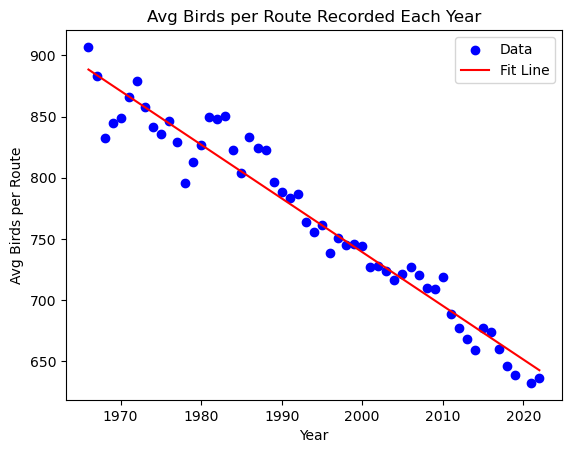

In [44]:
# Structure the data for use in Linear Regression
years = np.reshape(np.array(birds_by_year['Year']), (-1, 1))
birds_per_route = np.reshape(np.array(birds_by_year['AvgBirdsPerRoute']), (-1, 1))

# Make the LinearRegression Fit
birds_by_year_reg = LinearRegression().fit(years, birds_per_route)
birds_by_year_slope = birds_by_year_reg.coef_[0, 0]
birds_by_year_int = birds_by_year_reg.intercept_
print('Slope: ' + str(birds_by_year_slope))
print('Intercept: ' + str(birds_by_year_int))

# Plot the relationship with a trend/fit line
plt.scatter(birds_by_year['Year'], birds_by_year['AvgBirdsPerRoute'], color='blue', label='Data')
plt.title("Avg Birds per Route Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Avg Birds per Route")
plt.plot(birds_by_year['Year'], birds_by_year_int + birds_by_year_slope*birds_by_year['Year'], label='Fit Line', color='red')
plt.legend()
plt.show()

The slope tells us that we are losing around 4.4 birds per route every year. Let's see how this translates to total population expectations.

In [45]:
# Using an estimated 3000 total routes, calculate how many birds are lost each year (on average)
bird_loss = num_routes_2022*birds_by_year_slope
print('Estimated Bird Loss Each Year: ' + str(bird_loss))

# Calculate the number of birds we would have seen in 1966 if we had 3000 routes
bird_pop_1966 = num_routes_2022*birds_by_year.at[0, 'AvgBirdsPerRoute']

print('Estimated Bird Population Count in 1966 Assuming 3000 Routes: ' + str(bird_pop_1966))

bird_pop_2022 = birds_by_year.loc[55, 'SpeciesTotal']
print('Bird Population Count in 2022: ' + str(bird_pop_2022))

Estimated Bird Loss Each Year: -12699.918650641774
Estimated Bird Population Count in 1966 Assuming 3000 Routes: 2623657.9005628517
Bird Population Count in 2022: 1840465.0


That is a pretty dramatic decline. Of course, in any bird count not all of the birds in the United States can be counted. More complex models are used to predict total bird populations based on what is covered in the counts. But the trend we see here confirms significant bird population decline.

We have seen how bird population varies temporally, now lets consider how it varies spatially. To do so, we'll map bird populations over the United States for several different years.

In [46]:
# Read in the routes with FIPS CSV created above.
routes_FIPS_df = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Routes_with_FIPS.csv'), dtype={'StateFIPS': str, 'CountyFIPS': str, 'FIPS': str})

# Merge the interval_stop_copy dataframe with routes_FIPS_df. This adds columns with the
# corresponding latitude, longitude, State, County, and FIPS for each route. With this, we can map
# bird counts on each route.
interval_stop_copy_merged = interval_stop_copy.merge(routes_FIPS_df, how='left', left_on=['StateNum', 'Route'], right_on=['StateNum', 'Route'])
interval_stop_copy_merged.to_csv(os.path.join(current_dir, "..", "Data", "County_Bird_Routes.csv"), index=False)
interval_stop_copy_merged.head(5)

,RouteDataID,CountryNum_x,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,...,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,StateName,CountyName,StateFIPS,CountyFIPS,FIPS
0,6165530,840,52,32,1968,182.0,207.0,191.0,191.0,194.0,...,-94.665483,32,22,1,1,Missouri,Buchanan,29,021,29021
1,6165531,840,52,35,1968,159.0,139.0,132.0,135.0,116.0,...,-93.556344,32,22,1,1,Missouri,Grundy,29,079,29079
2,6165532,840,52,36,1968,193.0,225.0,170.0,160.0,162.0,...,-94.852829,32,22,1,1,Missouri,Andrew,29,003,29003
3,6165533,840,53,5,1968,84.0,97.0,96.0,114.0,210.0,...,-111.622297,38,11,1,1,Montana,Toole,30,101,30101
4,6165534,840,53,2,1968,95.0,76.0,76.0,88.0,91.0,...,-114.461929,65,10,1,1,Montana,Flathead,30,029,30029


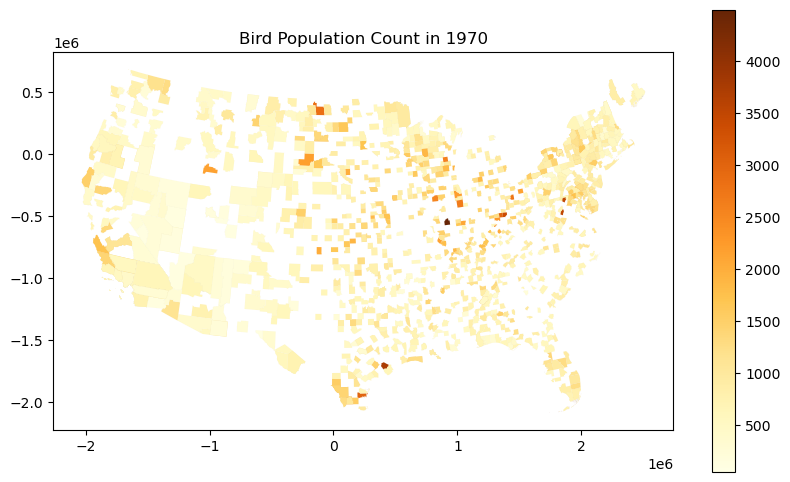

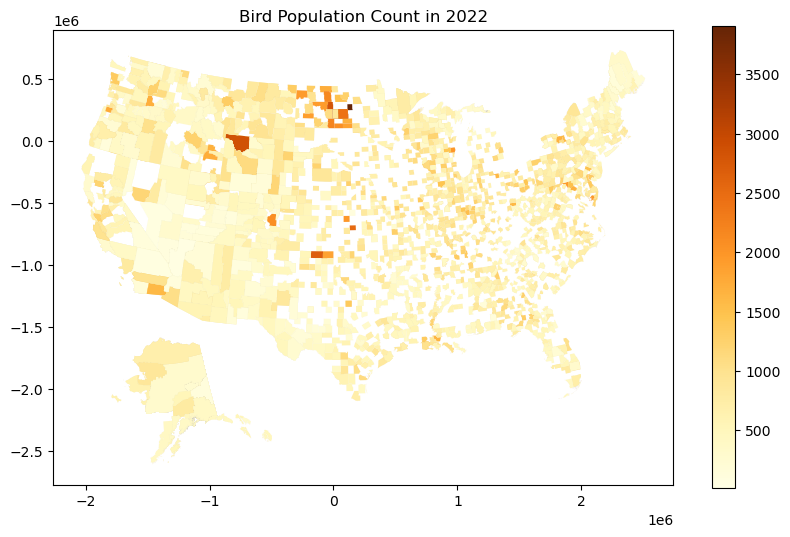

In [47]:
# Combine with county polygon data using geopandas
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

interval_stop_copy_map = counties.merge(interval_stop_copy_merged, how="left", left_on="FIPS", right_on="FIPS")

# Plot the map for 1970
column_to_plot = 'SpeciesTotal_MS'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
interval_stop_copy_map.loc[interval_stop_copy_map['Year']==1970].plot(column=column_to_plot, cmap='YlOrBr', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('Bird Population Count in 1970')
plt.show()

# Plot the map for 2022
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
interval_stop_copy_map.loc[interval_stop_copy_map['Year']==2022].plot(column=column_to_plot, cmap='YlOrBr', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('Bird Population Count in 2022')
plt.show()

### Visualizing and Analyzing Other Possible Factors

Before delving into analyzing factors impacting bird populations, it's crucial to merge our individual DataFrames into a single cohesive DataFrame. This consolidation allows us to leverage the collective insights from various datasets, facilitating comprehensive analyses and uncovering potential correlations across different variables. Let's use our previously merged DataFrame of our bird population analysis for convenience's sake.

Before we do that, we'll need to process the bird data a little more to aggregate it by county, which will make it match with the other factors.

In [48]:
bird_stuff = pd.read_csv(os.path.join(current_dir, "..", "Data", "County_Bird_Routes.csv"), dtype={'StateFIPS': str, 'CountyFIPS': str, 'FIPS': str})
# Keep only relevant columns
bird_stuff = bird_stuff[["RouteDataID", "StateNum", "Route", "Year", "SpeciesTotal_MS", "StateName", "CountyName", "StateFIPS", "CountyFIPS", "FIPS"]]
# Bring in cars
car_stuff = pd.read_csv(os.path.join(current_dir, "..", "SharedData", "interval_vehicles.csv"), dtype={'StateFIPS': str, 'CountyFIPS': str, 'FIPS': str})
car_stuff = car_stuff[["RouteDataID", "StateNum", "Route", "Year", "Car_Total"]]

# Join cars, fill missing values with 0
bird_and_car_stuff = bird_stuff.merge(car_stuff, left_on=["StateNum", "Route", "Year"], right_on=["StateNum", "Route", "Year"], how="left")
bird_and_car_stuff = bird_and_car_stuff.drop(columns=["RouteDataID_y"])
bird_and_car_stuff = bird_and_car_stuff.rename(columns={"RouteDataID_x": "RouteDataID"})
bird_and_car_stuff["Car_Total"] = bird_and_car_stuff["Car_Total"].fillna(0)
bird_and_car_stuff = bird_and_car_stuff.dropna(subset=["FIPS"]).reset_index(drop=True)
bird_and_car_stuff

,RouteDataID,StateNum,Route,Year,SpeciesTotal_MS,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,Car_Total
0,6165530,52,32,1968,965.0,Missouri,Buchanan,29,021,29021,0.0
1,6165531,52,35,1968,681.0,Missouri,Grundy,29,079,29079,0.0
2,6165532,52,36,1968,910.0,Missouri,Andrew,29,003,29003,0.0
3,6165533,53,5,1968,601.0,Montana,Toole,30,101,30101,0.0
4,6165534,53,2,1968,426.0,Montana,Flathead,30,029,30029,0.0
...,...,...,...,...,...,...,...,...,...,...,...
113649,6379975,60,3,2022,487.0,New Mexico,Rio Arriba,35,039,35039,8.0
113650,6379976,14,71,2021,1034.0,California,Marin,06,041,06041,308.0
113651,6379977,14,71,2022,953.0,California,Marin,06,041,06041,309.0
113652,6379978,85,206,2022,327.0,Utah,Wasatch,49,051,49051,13.0


In [49]:
climate = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Climate_Data_with_FIPS.csv'), dtype={'FIPS': str})
forest = pd.read_csv(os.path.join(current_dir, '..', 'Data', 'Deforestation', 'Annual_Forest_Loss_Threshold_50.csv'), dtype={'FIPS': str})
urban_index = pd.read_csv(os.path.join(current_dir, '..', 'Data', 'metro.csv'), dtype={'FIPS': str})
buildings = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'County_Building_Areas_Adjusted.csv'), dtype={'STATE_FIPS': str, 'CNTY_FIPS': str})
buildings["FIPS"] = buildings["STATE_FIPS"] + buildings["CNTY_FIPS"]

In [50]:
# DataFrame which we are merging all our values to

merged_df_all = bird_and_car_stuff.copy()

master = bird_and_car_stuff.merge(climate, how="left", on=["FIPS", "Year"])
master = master[master["Year"] >= 1970].reset_index(drop=True)
master = master.drop(columns=["State_Code", "County_FIPS"])
master = master.merge(forest, how="left", on=["FIPS", "Year"])
master = master.drop(columns=["threshold", "extent_2010_ha", "area_ha", "STATE_FIPS", "CNTY_FIPS", "STATE", "COUNTY", "area_sqmi"])
master.fillna({'extent_2000_ha':0, 'HA_Loss':0, 'percent_lost':0}, inplace=True)
master = master.merge(urban_index, how="left", on=["FIPS"])
master = master.drop(columns=["STATECODE", "COUNTY"])
master = master.merge(buildings, how="left", on=["FIPS"])
master = master.drop(columns=["STATE_NAME", "STATECODE", "STATE_FIPS", "COUNTY", "FORMAL_COUNTY", "CNTY_FIPS", "LandAreaSqMiles"])
master = master.rename(columns={"extent_2000_ha": "forest_extent_2000_ha", "HA_Loss": "Forest_HA_Loss", "percent_lost": "Forest_Percent_Lost"})

master.to_csv(os.path.join(current_dir, "..", "SharedData", "master_dataset.csv"), index=False)

master.head()

,RouteDataID,StateNum,Route,Year,SpeciesTotal_MS,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,...,Max_Temp,Min_Temp,Total_Precip,forest_extent_2000_ha,Forest_HA_Loss,Forest_Percent_Lost,URBAN_RURAL_SCORE,METRO_LEVEL,total_bldg_area,bldg_area_per_sq_mile
0,6165782,34,36,2003,779.0,Illinois,Cass,17,017,17017,...,86.8,14.5,35.38,16550.0,1.0,0.000060,6,Non-core,671600.0,1787.025704
1,6165783,34,38,2003,984.0,Illinois,Morgan,17,137,17137,...,86.4,15.2,37.56,13619.0,1.0,0.000073,5,Micropolitan,4715100.0,8289.702702
2,6165784,34,39,2003,743.0,Illinois,Calhoun,17,013,17013,...,88.0,17.3,43.34,30972.0,3.0,0.000097,2,Large fringe metropolitan,41400.0,163.101288
3,6165785,34,40,2003,1295.0,Illinois,Christian,17,021,17021,...,86.4,15.3,39.54,9110.0,0.0,0.000000,5,Micropolitan,3509100.0,4946.714032
4,6165786,34,44,2003,1439.0,Illinois,Champaign,17,019,17019,...,85.2,11.8,39.25,4408.0,0.0,0.000000,4,Small metropolitan,66449200.0,66697.983478


Now that we've successfully merged all our DataFrames into one DataFrame, we can properly do some analysis of our other factors and determine if their significance in impacting our bird populations in the U.S.

In [51]:
# Generalized function for plotting features against each other
def plot_dependent_vs_independent(df, column_independent, column_dependent, regression=False):
    # Drop rows with NaN values in the specified columns
    df_cleaned = df.dropna(subset=[column_independent, column_dependent])
    
    # Extract the specified columns from the cleaned DataFrame
    x_values = df_cleaned[column_independent]
    y_values = df_cleaned[column_dependent]
    
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o')
    plt.xlabel(column_independent)
    plt.ylabel(column_dependent)
    plt.title(f'{column_dependent} vs. {column_independent}')
    
    # Add regression line if desired
    if regression:
        X = x_values.values.reshape(-1, 1)
        y = y_values.values
        model = LinearRegression()
        model.fit(X, y)
        plt.plot(X, model.predict(X), color='red')
        
        slope = model.coef_[0]
        intercept = model.intercept_
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
    
    plt.grid(True)
    plt.show()

Let's visualize some of the climate variables over time to see trends.

Slope: 0.04722791109053341
Intercept: -40.01506629074928


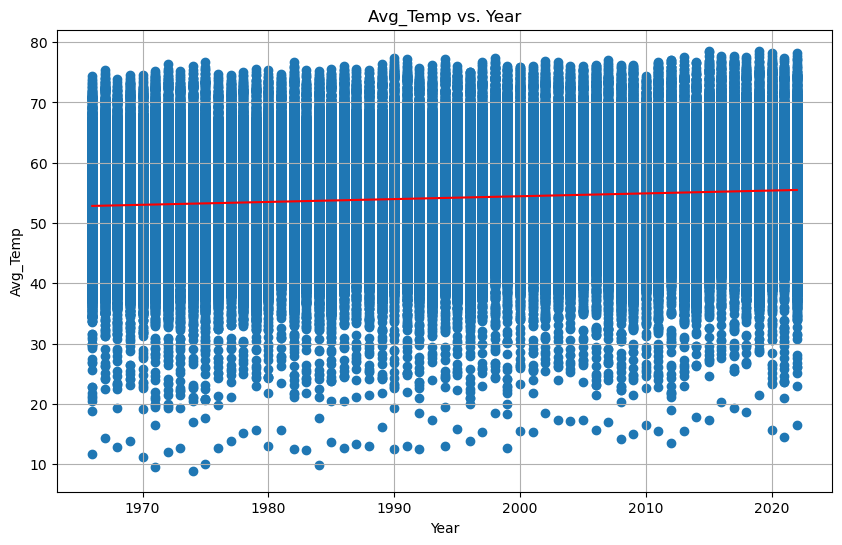

In [52]:
# Plotting Avg_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Avg_Temp', True)

Slope: 0.02007368913638679
Intercept: 47.44567374186063


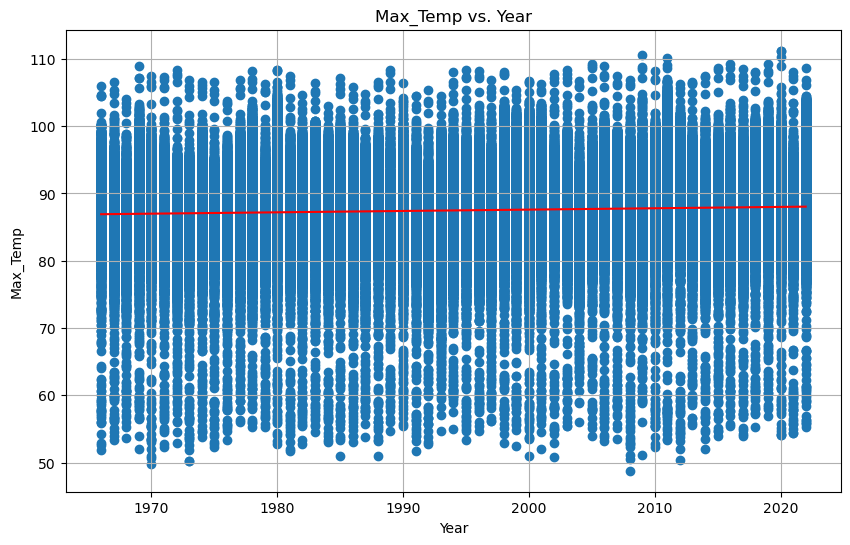

In [53]:
# Plotting Max_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Max_Temp', True)

Slope: 0.07605680368355192
Intercept: -131.71698221926948


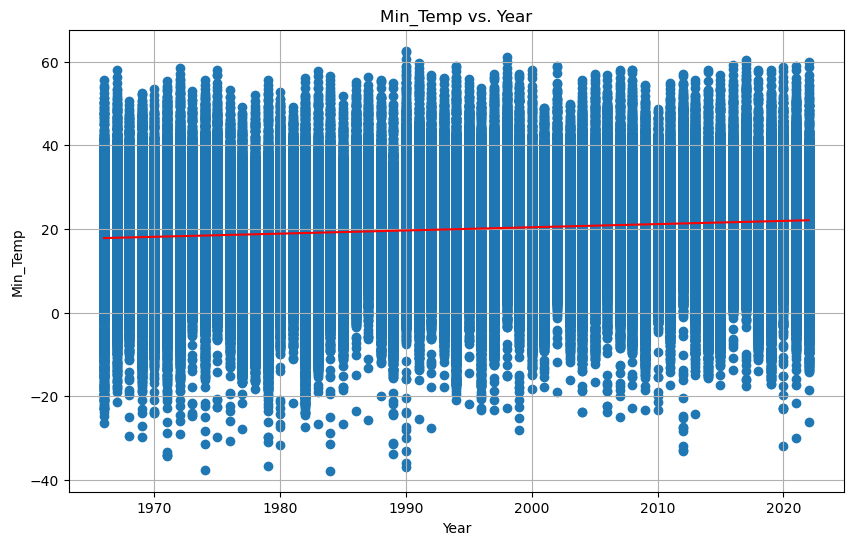

In [54]:
# Plotting Max_Temp across Time
plot_dependent_vs_independent(climate, 'Year', 'Min_Temp', True)

From the looks of things, while our model predicts a general increase in temperature throughout each county, the spread of our data points is so far out, that we can't really say that this is a strong correlation. What if we visualize this data geographically?

Let's read in the MetricT county shapefile data again to create map visualizations. We'll pull the original files again, because we want to look at non-annual data.

In [55]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

In [56]:
merged = counties.merge(climate, how="inner", left_on="FIPS", right_on="FIPS")

In [57]:
def plot_map(column_to_plot, dataset, title, cmap="inferno"):
    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    dataset.plot(column=column_to_plot, cmap=cmap, linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
    plt.title(title)
    plt.show()

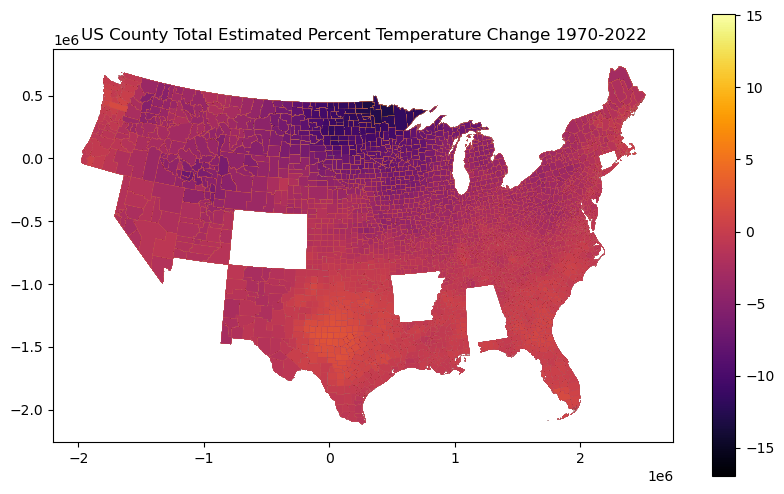

In [58]:
merged['temp_change_percent'] = merged.groupby('FIPS')['Avg_Temp'].pct_change() * 100

plot_map("temp_change_percent", merged, "US County Total Estimated Percent Temperature Change 1970-2022")

Looking at this map alone, this reinforces our case where it's difficult to determine the temperature based on year since while in some areas the average temperature is increasig, there are other areas where the average temperature is surprisingly decreasing. Our graph does look a little spotty with some missing states, but what the hell. That can be attributed to how our data was collected to begin with (Collecting climate data which doesn't follow a good format sucks). Let's look at some other data, where we climate factors to each other.

Slope: 1.045301707880954
Intercept: -37.27788007640161


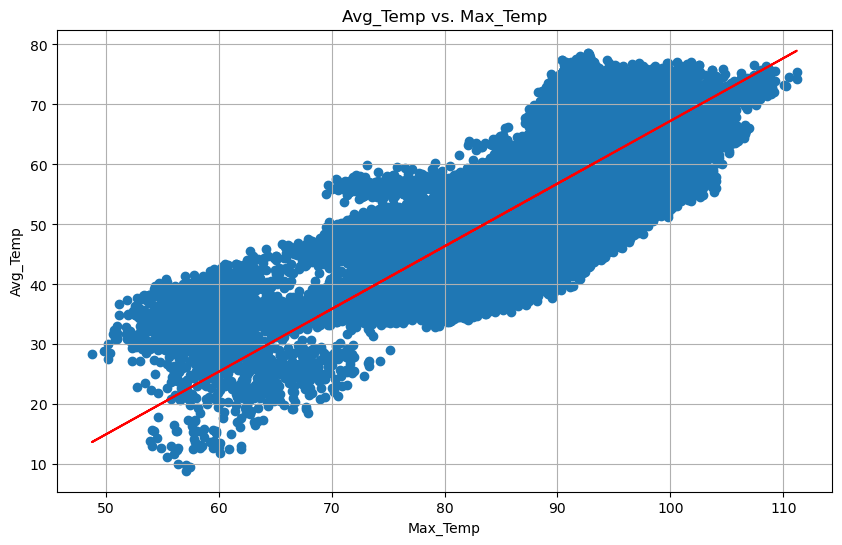

In [59]:
plot_dependent_vs_independent(climate, 'Max_Temp', 'Avg_Temp', True)

Slope: 0.6208198065402167
Intercept: 41.77806496631584


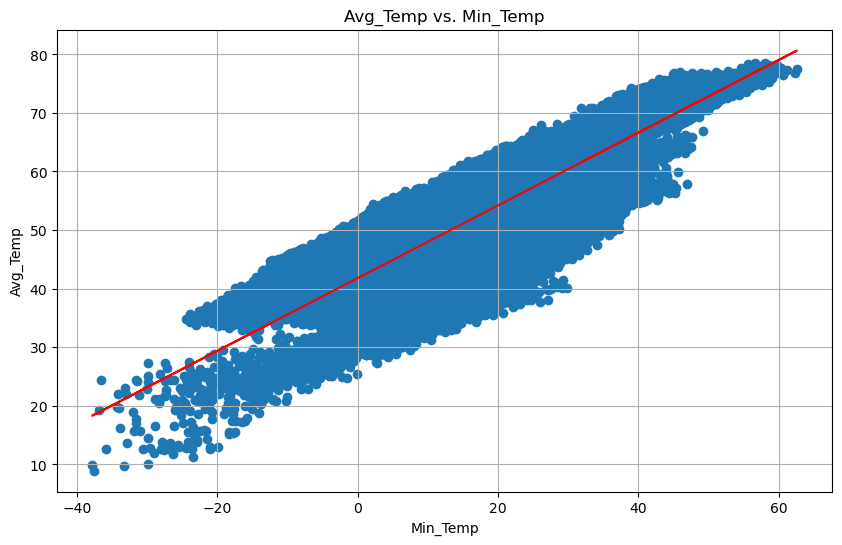

In [60]:
plot_dependent_vs_independent(climate, 'Min_Temp', 'Avg_Temp', True)

Interesting. We it seems like our regression like is more set in stone when comparing temperatures to each other. However, there's still some spread. Let's keep these metrics in mind when developing our model.

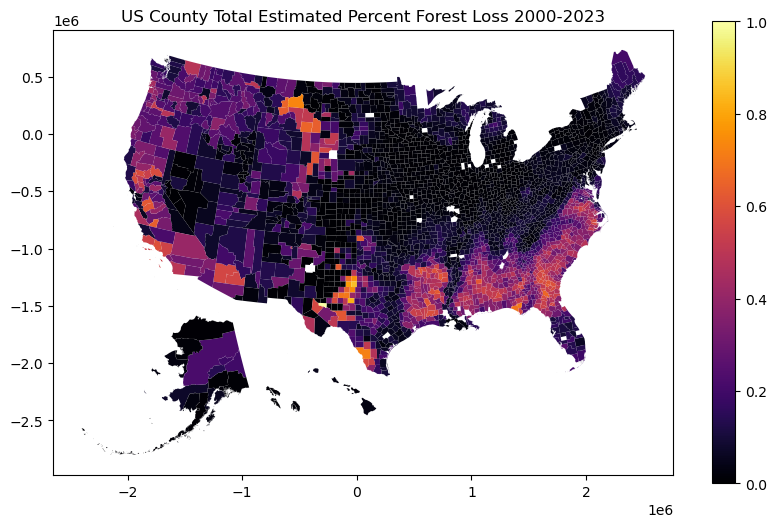

In [61]:
# Bring in forest data
forest = pd.read_csv(os.path.join(current_dir, "..", "Data", "Deforestation", "Total_Forest_Loss_Threshold_50.csv"), dtype={'FIPS': str})

merged = counties.merge(forest, how="inner", left_on="FIPS", right_on="FIPS")

plot_map("percent_lost", merged, "US County Total Estimated Percent Forest Loss 2000-2023")

As we can see, there seems to be the most forest loss in the Southeastern US, the West Coast, and various parts of Texas, Montana, and Wyoming areas. However, there is one factor of this dataset that we did not consider before creating this map. Many counties in the US did not begin with much forest at all, mostly in counties in arid or cold biomes, such as grasslands and desert. Consider a county who reports losing 2 hectares of forest. The percentage of forest lost changes dramatically based on whether this county started with 2,000 hectares of forest, or 3 hectares of forest. As such, counties like these who started with little forest and lost "most" of their forest are potentially confounding this visualization, because while it is true that these counties did lose a large percentage of their forests, they are not our primary focus with this data. To investigate this further, let's visualize the forest density across the US.

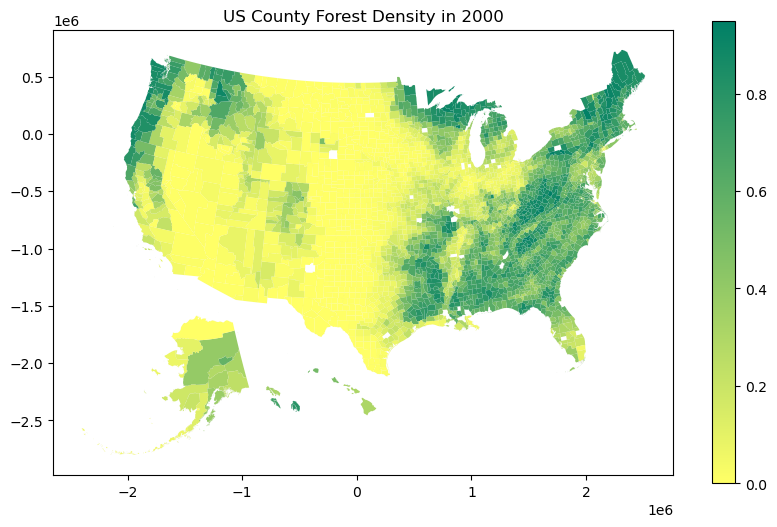

In [62]:
# This will produce a percent coverage value based on how much of the total area of the county was covered in forest in 2000.
merged["Coverage"] = merged["extent_2000_ha"] / merged["area_ha"]

plot_map("Coverage", merged, "US County Forest Density in 2000", "summer_r")

This is very informative. Many counties, particularly those in the Great Plains and those in the Mojave desert, did not begin with much forest at all. We don't want to fully ignore these counties, but perhaps we can scale them in importance by making those counties with higher forest density show a higher loss value than those with lower forest density.

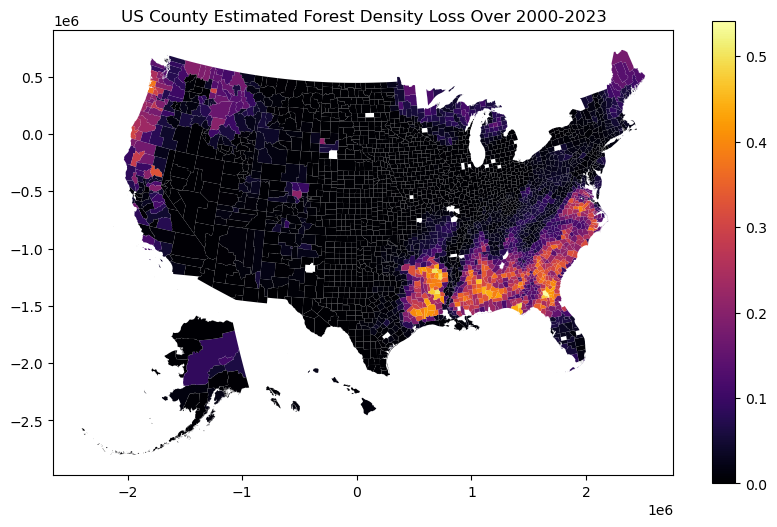

In [63]:
# Scale loss by forest density calculated above
merged["Scaled_Loss"] = merged["Coverage"] * merged["percent_lost"]

plot_map("Scaled_Loss", merged, "US County Estimated Forest Density Loss Over 2000-2023")

Wow! This scaling shows a much more systematic map; it appears that the southeastern US and the northern West Coast experienced the most intense forest loss, having started with ample forest coverage, while those counties with lower forest coverage show much less significant loss. 

Let's now visualize the urban index data to find patterns there.

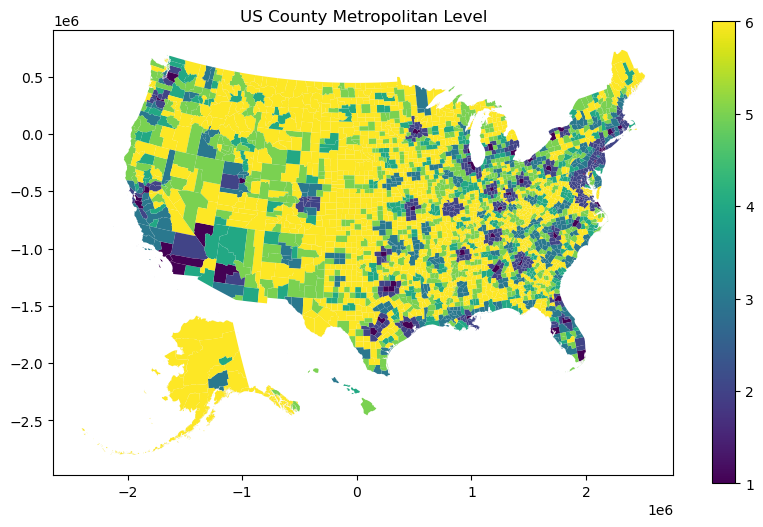

In [64]:
urban_index_data = pd.read_csv(os.path.join(current_dir, "..", "Data", "metro.csv"), dtype={"FIPS": str})

merged = counties.merge(urban_index_data, how="inner", left_on="FIPS", right_on="FIPS")

plot_map("URBAN_RURAL_SCORE", merged, "US County Metropolitan Level", "viridis")

As expected, the counties with the highest level of urbanization (lowest index) are those that contain or lie near large metropolitan centers in the USA. If you wanted, you could probably figure out the metropolis represented by each purple cluster of counties; you can certainly see Los Angeles, Chicago, Atlanta, and the Boston-Washington corridor. 

Let us now visualize the commercial building data.

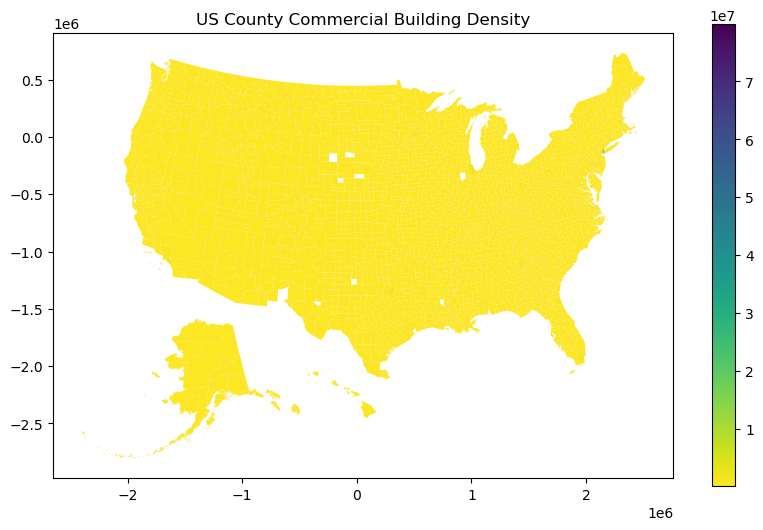

In [65]:
building_density = pd.read_csv(os.path.join(current_dir, "..", "SharedData", "County_Building_Areas_Adjusted.csv"), dtype={"CNTY_FIPS": str, "STATE_FIPS": str})
# Create combined FIPS code
building_density["FIPS"] = building_density["STATE_FIPS"] + building_density["CNTY_FIPS"]

merged = counties.merge(building_density, how="inner", left_on="FIPS", right_on="FIPS")

plot_map("bldg_area_per_sq_mile", merged, "US County Commercial Building Density", "viridis_r")

Well, that's not very informative. What's causing this? If you look very closely at the northern East Coast, you may see a single speck of purple and green. This is New York City, whose building density is extremely high, and very disproportionate to the rest of the country. 

Looks like we'll need to apply a transformation to this value to create a meaningful visualization! Let's log transform the values. 

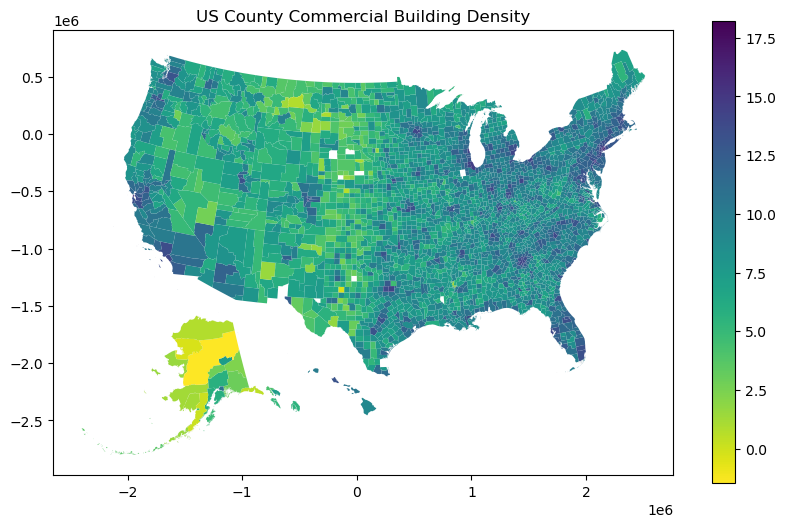

In [66]:
merged['log_density'] = np.log(merged['bldg_area_per_sq_mile'])

plot_map("log_density", merged, "US County Commercial Building Density", "viridis_r")

That's much better. Once again, you may be able to see some of the large metropolitan areas in the United States in the darker areas.

Urban index and building density may be correlated, since they deal with similar ideas. Let's see if that's true!

Slope: -1.061270320885903
Intercept: 13.40677650563575


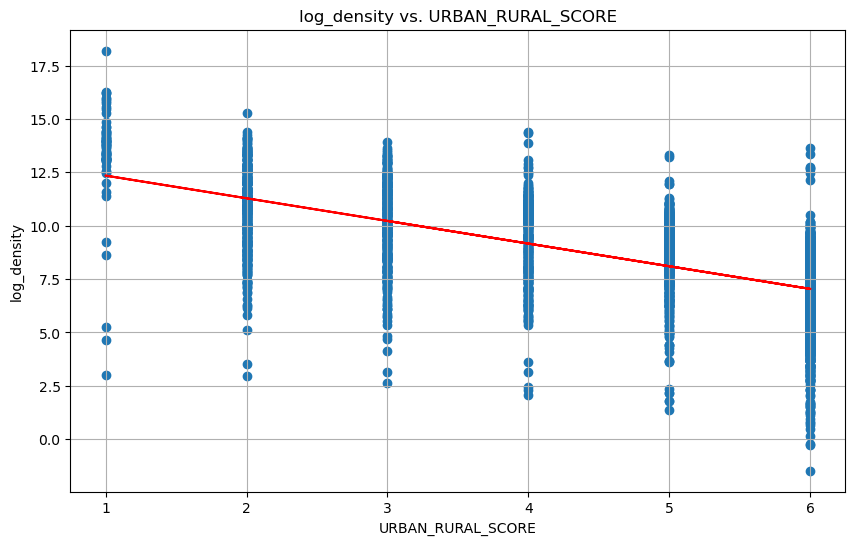

In [67]:
merged = urban_index_data.merge(building_density, how="inner", left_on="FIPS", right_on="FIPS")

# Create log transform again
merged['log_density'] = np.log(merged['bldg_area_per_sq_mile']) 

plot_dependent_vs_independent(merged, "URBAN_RURAL_SCORE", "log_density", True)

We can see a general correlation here, it's true, but there is a lot of variation. Both metrics will therefore be uniquely useful to us, so let's use both in our model.

## Hypothesis Testing and Machine Learning
Now, we attempt to create several predictive models which will allow us to predict things like bird population and population decline based on myriad environmental factors. Such models will allow us to predict likely future trends and values based on previous data. Additionally, analyzing the data through these models will allow us to understand which environmental factors are the most significant predictors of bird population decline. Through this statistical analysis, we can begin to understand what practices are most harmful to bird populations, giving us some insight about policy decision which will reduce population decline in the future.

[This article](http://20bits.com/article/hypothesis-testing-the-basics) and [this paper](https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf) provide good information on hypothesis testing.

For additional information about Machine Learning, see [these cheatsheets](https://ml-cheatsheet.readthedocs.io/en/latest/) and [this list of tutorials](https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc).

In [68]:
master = pd.read_csv('../SharedData/master_dataset.csv')

In [69]:
master_copy = master.copy()
master_copy.head(5)

,RouteDataID,StateNum,Route,Year,SpeciesTotal_MS,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,...,Max_Temp,Min_Temp,Total_Precip,forest_extent_2000_ha,Forest_HA_Loss,Forest_Percent_Lost,URBAN_RURAL_SCORE,METRO_LEVEL,total_bldg_area,bldg_area_per_sq_mile
0,6165782,34,36,2003,779.0,Illinois,Cass,17,17,17017,...,86.8,14.5,35.38,16550.0,1.0,0.000060,6,Non-core,671600.0,1787.025704
1,6165783,34,38,2003,984.0,Illinois,Morgan,17,137,17137,...,86.4,15.2,37.56,13619.0,1.0,0.000073,5,Micropolitan,4715100.0,8289.702702
2,6165784,34,39,2003,743.0,Illinois,Calhoun,17,13,17013,...,88.0,17.3,43.34,30972.0,3.0,0.000097,2,Large fringe metropolitan,41400.0,163.101288
3,6165785,34,40,2003,1295.0,Illinois,Christian,17,21,17021,...,86.4,15.3,39.54,9110.0,0.0,0.000000,5,Micropolitan,3509100.0,4946.714032
4,6165786,34,44,2003,1439.0,Illinois,Champaign,17,19,17019,...,85.2,11.8,39.25,4408.0,0.0,0.000000,4,Small metropolitan,66449200.0,66697.983478


Calculate the percent change for variables that aren't stable over time. Unstable variables include environmental readings like temperature, whereas things like total building area in a county does not tend to change. 

In [70]:
changes = master_copy[['SpeciesTotal_MS', 'Car_Total', 'Avg_Temp', 'Max_Temp', 'Min_Temp', 'Total_Precip']]
changes = changes.pct_change(fill_method = None)*100
master_copy[changes.columns] = changes

master_copy.columns = ['RouteDataID', 'StateNum', 'Route', 'Year', 'BirdPercentChange', 'StateName', 'CountyName', 'StateFIPS', 'CountyFIPS', 'FIPS', 'CarPercentChange', 'AvgTempPercentChange', 'MaxTempPercentChange', 'MinTempPercentChange', 'PrecipPercentChange', 'forest_extent_2000_ha', 'Forest_HA_Loss', 'Forest_Percent_Lost', 'URBAN_RURAL_SCORE', 'METRO_LEVEL', 'total_bldg_area', 'bldg_area_per_sq_mile']
master_copy.head(5)

,RouteDataID,StateNum,Route,Year,BirdPercentChange,StateName,CountyName,StateFIPS,CountyFIPS,FIPS,...,MaxTempPercentChange,MinTempPercentChange,PrecipPercentChange,forest_extent_2000_ha,Forest_HA_Loss,Forest_Percent_Lost,URBAN_RURAL_SCORE,METRO_LEVEL,total_bldg_area,bldg_area_per_sq_mile
0,6165782,34,36,2003,NaN,Illinois,Cass,17,17,17017,...,NaN,NaN,NaN,16550.0,1.0,0.000060,6,Non-core,671600.0,1787.025704
1,6165783,34,38,2003,26.315789,Illinois,Morgan,17,137,17137,...,-0.460829,4.827586,6.161673,13619.0,1.0,0.000073,5,Micropolitan,4715100.0,8289.702702
2,6165784,34,39,2003,-24.491870,Illinois,Calhoun,17,13,17013,...,1.851852,13.815789,15.388711,30972.0,3.0,0.000097,2,Large fringe metropolitan,41400.0,163.101288
3,6165785,34,40,2003,74.293405,Illinois,Christian,17,21,17021,...,-1.818182,-11.560694,-8.767882,9110.0,0.0,0.000000,5,Micropolitan,3509100.0,4946.714032
4,6165786,34,44,2003,11.119691,Illinois,Champaign,17,19,17019,...,-1.388889,-22.875817,-0.733434,4408.0,0.0,0.000000,4,Small metropolitan,66449200.0,66697.983478


Drop any NaNs or infinites that may be present (including those that are caused by a route having no previous year to compare to when calculating percent loss for different variables)

In [71]:
all_years = master_copy.copy()
aughts = master_copy[master_copy['Year'] >= 2000].copy()

all_years.dropna(inplace=True)
all_years.replace([np.inf, -np.inf], np.nan, inplace=True)
aughts.dropna(inplace=True)
aughts.replace([np.inf, -np.inf], np.nan, inplace=True)


Now, create two models with significance level 0.05. Since deforestation and vehicle data aren't both consistently present before the year 2000, we will have one model that excludes those factors but includes all the routes, while another includes those factors but limits its routes and bird counts to those taken after 2000. 

In [72]:
all_years_model = stats.ols(formula = 'BirdPercentChange ~ AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + URBAN_RURAL_SCORE + METRO_LEVEL + total_bldg_area + bldg_area_per_sq_mile', data = all_years).fit()
all_years_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BirdPercentChange   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        23:54:58   Log-Likelihood:            -2.5017e+05
No. Observations:               40093   AIC:                         5.004e+05
Df Residuals:                   40081   BIC:                         5.005e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   35.1257     11.283      3.113      0.002      13.011      57.241
METRO_LEVEL[T.Large fringe metropolitan]    -4.4064      6.601     -0.668      0.504     -17.345       8.532
METRO_LEVEL[T.Medium metropolitan]          -3.1380      4.625     -0.679      0.497     -12.203       5.927
METRO_LEVEL[T.Micropolitan]                  1.2746      1.117      1.141      0.254      -0.915       3.464
METRO_LEVEL[T.Non-core]                     -1.8342      2.116     -0.867      0.386      -5.981       2.313
METRO_LEVEL[T.Small metropolitan]           -7.5821      2.789     -2.718      0.007     -13.049      -2.115
AvgTempPercentChange                        -1.0219      0.059    -17.412      0.000      -1.137      -0.907
MaxTempPercentChange                         2.3878      0.137     17.479      0.000       2.120       2.656
MinTempPercentChange                        -0.0015      0.001     -2.467      0.014      -0.003      -0.000
PrecipPercentChange                          0.2959      0.007     40.246      0.000       0.281       0.310
URBAN_RURAL_SCORE                           -2.3755      2.201     -1.079      0.280      -6.689       1.938
total_bldg_area                          -6.852e-08   1.33e-08     -5.136      0.000   -9.47e-08   -4.24e-08
bldg_area_per_sq_mile                     5.606e-05   9.07e-06      6.181      0.000    3.83e-05    7.38e-05
==============================================================================
Omnibus:                    56842.797   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42256077.754
Skew:                           8.089   Prob(JB):                         0.00
Kurtosis:                     161.218   Cond. No.                     4.76e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
aughts_model = stats.ols(formula = 'BirdPercentChange ~ CarPercentChange + AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + Forest_Percent_Lost + URBAN_RURAL_SCORE + METRO_LEVEL + total_bldg_area + bldg_area_per_sq_mile', data = aughts).fit()
aughts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BirdPercentChange   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        23:55:42   Log-Likelihood:            -1.9379e+05
No. Observations:               31346   AIC:                         3.876e+05
Df Residuals:                   31332   BIC:                         3.877e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   45.4566     12.012      3.784      0.000      21.912      69.001
METRO_LEVEL[T.Large fringe metropolitan]   -11.8957      7.018     -1.695      0.090     -25.652       1.861
METRO_LEVEL[T.Medium metropolitan]          -9.0600      4.925     -1.840      0.066     -18.712       0.592
METRO_LEVEL[T.Micropolitan]                  0.4378      1.194      0.367      0.714      -1.903       2.778
METRO_LEVEL[T.Non-core]                      0.5608      2.252      0.249      0.803      -3.853       4.975
METRO_LEVEL[T.Small metropolitan]           -8.2489      2.973     -2.775      0.006     -14.076      -2.422
CarPercentChange                             0.0023      0.000      7.181      0.000       0.002       0.003
AvgTempPercentChange                        -1.1296      0.064    -17.671      0.000      -1.255      -1.004
MaxTempPercentChange                         2.5592      0.149     17.171      0.000       2.267       2.851
MinTempPercentChange                      4.952e-05      0.001      0.069      0.945      -0.001       0.001
PrecipPercentChange                          0.3011      0.008     36.855      0.000       0.285       0.317
Forest_Percent_Lost                       -290.0221     57.405     -5.052      0.000    -402.539    -177.505
URBAN_RURAL_SCORE                           -4.7506      2.342     -2.029      0.043      -9.341      -0.160
total_bldg_area                          -6.666e-08   1.44e-08     -4.623      0.000   -9.49e-08   -3.84e-08
bldg_area_per_sq_mile                     4.154e-05    9.8e-06      4.239      0.000    2.23e-05    6.07e-05
==============================================================================
Omnibus:                    44196.314   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33529765.888
Skew:                           7.982   Prob(JB):                         0.00
Kurtosis:                     162.428   Cond. No.                     2.26e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Notice that METRO_LEVEL and URBAN_RURAL_SCORE variables have p-values greater than our significance level of 0.05 in both models. This means they aren't great predictors of bird loss. Let's exclude them and make two new models.

In [74]:
adjusted_all_years_model = stats.ols(formula = 'BirdPercentChange ~ AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + total_bldg_area + bldg_area_per_sq_mile', data = all_years).fit()
adjusted_all_years_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BirdPercentChange   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     293.2
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        23:56:05   Log-Likelihood:            -2.5018e+05
No. Observations:               40093   AIC:                         5.004e+05
Df Residuals:                   40086   BIC:                         5.004e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                21.3854      0.672     31.830      0.000      20.069      22.702
AvgTempPercentChange     -1.0021      0.058    -17.170      0.000      -1.116      -0.888
MaxTempPercentChange      2.3613      0.136     17.322      0.000       2.094       2.628
MinTempPercentChange     -0.0015      0.001     -2.463      0.014      -0.003      -0.000
PrecipPercentChange       0.2962      0.007     40.295      0.000       0.282       0.311
total_bldg_area       -6.032e-08    1.1e-08     -5.508      0.000   -8.18e-08   -3.89e-08
bldg_area_per_sq_mile   6.08e-05   8.77e-06      6.934      0.000    4.36e-05     7.8e-05
==============================================================================
Omnibus:                    56853.071   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42335411.539
Skew:                           8.092   Prob(JB):                         0.00
Kurtosis:                     161.368   Cond. No.                     1.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
adjusted_aughts_model = stats.ols(formula = 'BirdPercentChange ~ CarPercentChange + AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + Forest_Percent_Lost + total_bldg_area + bldg_area_per_sq_mile', data = aughts).fit()
adjusted_aughts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BirdPercentChange   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     198.0
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        23:56:16   Log-Likelihood:            -1.9380e+05
No. Observations:               31346   AIC:                         3.876e+05
Df Residuals:                   31337   BIC:                         3.877e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                19.6619      0.791     24.866      0.000      18.112      21.212
CarPercentChange          0.0024      0.000      7.256      0.000       0.002       0.003
AvgTempPercentChange     -1.1118      0.064    -17.489      0.000      -1.236      -0.987
MaxTempPercentChange      2.5343      0.149     17.043      0.000       2.243       2.826
MinTempPercentChange   4.332e-05      0.001      0.060      0.952      -0.001       0.001
PrecipPercentChange       0.3013      0.008     36.888      0.000       0.285       0.317
Forest_Percent_Lost    -300.1803     57.309     -5.238      0.000    -412.509    -187.852
total_bldg_area       -5.012e-08    1.2e-08     -4.192      0.000   -7.36e-08   -2.67e-08
bldg_area_per_sq_mile  4.501e-05   9.49e-06      4.743      0.000    2.64e-05    6.36e-05
==============================================================================
Omnibus:                    44204.687   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33594811.331
Skew:                           7.985   Prob(JB):                         0.00
Kurtosis:                     162.583   Cond. No.                     8.93e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we will run k-fold validation to choose which one of our model (all_years_model, aughts_model, adjusted_all_years_model, or adjusted_aughts_model) we prefer. K-fold validation is when you split your dataset into different training and validation sets multiple times in different ways in order to make sure that you haven't overfit your data. 

In [76]:
relationships = ['BirdPercentChange ~ AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + URBAN_RURAL_SCORE + METRO_LEVEL + total_bldg_area + bldg_area_per_sq_mile', 
                'BirdPercentChange ~ CarPercentChange + AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + Forest_Percent_Lost + URBAN_RURAL_SCORE + METRO_LEVEL + total_bldg_area + bldg_area_per_sq_mile',
                'BirdPercentChange ~ AvgTempPercentChange * MaxTempPercentChange * MinTempPercentChange * PrecipPercentChange * total_bldg_area * bldg_area_per_sq_mile',
                'BirdPercentChange ~ CarPercentChange + AvgTempPercentChange + MaxTempPercentChange + MinTempPercentChange + PrecipPercentChange + Forest_Percent_Lost + total_bldg_area + bldg_area_per_sq_mile']

independent_vars = [['AvgTempPercentChange', 'MaxTempPercentChange', 'MinTempPercentChange', 'PrecipPercentChange', 'URBAN_RURAL_SCORE', 'METRO_LEVEL', 'total_bldg_area', 'bldg_area_per_sq_mile'],  
                  ['CarPercentChange', 'AvgTempPercentChange', 'MaxTempPercentChange', 'MinTempPercentChange', 'PrecipPercentChange', 'Forest_Percent_Lost', 'URBAN_RURAL_SCORE', 'METRO_LEVEL', 'total_bldg_area', 'bldg_area_per_sq_mile'],
                  ['AvgTempPercentChange','MaxTempPercentChange', 'MinTempPercentChange', 'PrecipPercentChange', 'total_bldg_area', 'bldg_area_per_sq_mile'],
                  ['CarPercentChange', 'AvgTempPercentChange', 'MaxTempPercentChange', 'MinTempPercentChange', 'PrecipPercentChange', 'Forest_Percent_Lost', 'total_bldg_area','bldg_area_per_sq_mile']]

model_num = 0


kf = KFold(n_splits = 5, shuffle = True)
df = None

for relationship in relationships: 
    fold = 0

    if model_num < 2: 
        df = all_years
    else:
        df = aughts

    for train_index, test_index in kf.split(df):
        train_df, test_df = df.iloc[train_index], df.iloc[test_index]

        model = stats.ols(formula = relationship, data = df).fit()
        predictions = model.predict(test_df[independent_vars[model_num]])
        MSE = ((predictions - test_df['BirdPercentChange'])**2).mean()
        fold += 1
    
    model_num += 1

    # see all statistics
    if fold == kf.get_n_splits():
        print(f"In model {model_num}, the MSE is {MSE}")

In model 1, the MSE is 13817.882772609739
In model 2, the MSE is 12761.12125038821
In model 3, the MSE is 17304.70914600507
In model 4, the MSE is 12063.193068323526


adjusted_aughts_model has the lowest MSE and is therefore our preferred model. This model used the following independent variables: CarPercentChange, AvgTempPercentChange, MaxTempPercentChange, MinTempPercentChange, PrecipPercentChange, Forest_Percent_Lost, total_bldg_area,  and bldg_area_per_sq_mile. We can therefore conclude that these are the most important factors in predicting bird loss. The fact that the models that excluded CarPercentChange and Forest_Percent_Loss didn't do as well also specifically point to the importance in considering the effects of dwindling canopy cover and increasingly car-centric communities on bird populations. However, these MSE values are admittedly quite high regardless, raising the question of whether a different model trained on the same data could make better predictions.

## Insight and Policy Decision
In this part of the data science pipeline, we interpret what our visualizations and models are telling us about the data. We considered a wide variety of factors and tested them for significance in their effects on bird population. 

Based on our analysis, we found the following main points to be true:

1. Bird populations are decreasing drastically each year. We see this in the "birds per route" metric; each year, birders find less birds at each route on average, suggesting that, overall, there are less birds present. Even as the scale of the Breeding Bird Survey increases (more routes), we are counting less birds than expected.
2. Many environmental factors, such as tree cover/forest abundance and temperatures have also experienced dramatic changes over time.
3. Tree cover loss/deforestation is a significant predictor of bird population decline, especially for birds which live and breed in forested areas.
4. Areas with greater commercial building density also have greater bird population decline.
5. Temperature changes related to climate change may also play a role in bird population decline.

These results inform us on some important policy decisions which can be made to mitigate bird (and overall biodiversity) population loss in the future. On a local scale or national scale, we can help birds survive by maintaining tree coverage, even in urban areas, by keeping more natural areas in our developments, and by taking steps to reduce the effects of climate change on a larger scale. 

The Earth is changing, in large part due to human activity. By adjusting our ways of life, we can help protect the biodiversity which makes Earth so special. In this project, we focused on birds, due to their importance in almost all ecosystems on Earth. Birds are abundant, but we cannot take their positive impacts on the planet for granted. As the data tells us, without making a change, birds, other animals, and perhaps even humans will experience many hardships in the years to come.

We hope this tutorial has given you a good overview of the data science pipeline: collecting data, processing it into useful forms, visualizing and exploring what the data show, analyzing the data with machine learning, and gaining insight from what each step shows us. Environmental conservation is a fantastic and challenging application of data science, and a field which could benefit from new and creative solutions. We encourage you to apply data science to your own questions, and perhaps we can use what we learn to build a better world. As an example of this kind of work, check out [Computational Sustainability](https://computational-sustainability.cis.cornell.edu/), a partnership pioneered by Cornell and several other universities which applies computational power to all facets of sustainability.